![title](https://image.ibb.co/erDntK/logo2018.png)

---




# Task 3 - Deep Neural Network


In this assignment you will practice putting together a simple image classification pipeline, based on the Multi-layer Neural Network classifier. 

The goals of this assignment are as follows:

    * understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
    * implement various modern activation functions
    * implement more compact and efficient Deep Neural Network API
    * investigate the power of deep network
    * implement and apply Batch Normalization



---
# [Part 0] Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=7)

Write down your Name and Student ID

In [0]:
## --- start your code here ----

NIM = 1301160098
Nama = "Panji Bagaskara"

## --- end your code here ----

---
# [Part 1] More Compact API
In the previous homework you implemented a fully-connected two-layer neural network on CIFAR-10. The implementation was simple but not very modular.

<p align="center"><img src="https://stanford.edu/~shervine/images/neural-network.png"></p>

In this exercise we will implement a **forward** and a **backward** function for fully-connected networks using a **more compact modular** approach. 

The **forward** function will receive inputs, weights, and other parameters and will return both an output and a **cache** object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```



---
The **backward** pass will receive upstream derivatives and the **cache** object, and will return **gradients** with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```


---
## 1 - Basic Layer Functions


After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.

For this part, we've laready provide you the implementation of some basic layers

---
### a. Affine API


In [0]:
def affine_forward(x, W, b):   
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). 

    Inputs:
    - x    : A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - W    : A numpy array of weights, of shape (D, M)
    - b    : A numpy array of biases, of shape (M,)
    
    Returns a tuple of:
    - v    : output, of shape (N, M)
    - cache: (x, w, b)
    """

    v = np.dot(x, W) + b    
    cache = (x, W, b)
    
    return v, cache

In [0]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout : Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x  : Input data, of shape (N, d_1, ... d_k)
      - W  : Weights, of shape (D, M)
      - b  : Biases, of shape (M,)

    Returns a tuple of:
    - dx   : Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw   : Gradient with respect to w, of shape (D, M)
    - db   : Gradient with respect to b, of shape (M,)
    """
    
    x, W, b = cache
    dW = np.dot(x.T,dout)
    db = np.sum(dout, axis=0, keepdims=True)
    dx = dout.dot(W.T)
    
    return dW, db, dx

### b. Tanh API

<p align="center"><img src="https://stanford.edu/~shervine/images/tanh.png" width="200"></p>

In [0]:
def tanh_forward(x):     
    """
    Computes the forward pass for a layer of Hyperbolic tangent (tanh).

    Input:
    - x    : Inputs, of any shape

    Returns a tuple of:
    - out  : Output, of the same shape as x
    - cache: 1-tanh(x)^2
    """
  
    out = np.tanh(x)
    cache = 1-out**2
    
    return out, cache

In [0]:
def tanh_backward(dout, cache):  
    """
    Computes the backward pass for a layer of Hyperbolic tangent (tanh).

    Input:
    - dout : Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx   : Gradient with respect to x
    """ 
  
    dx = dout*cache
    
    return dx

### c. ReLU API
<p align="center"><img src="https://stanford.edu/~shervine/images/relu.png" width="200"></p>

In [0]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x    : Inputs, of any shape

    Returns a tuple of:
    - out  : Output, of the same shape as x
    - cache: x
    """
  
    out = x * (x > 0).astype(float)
    cache = x
    
    return out, cache

In [0]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout : Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx   : Gradient with respect to x
    """
  
    dx = dout * (cache >= 0)
    
    return dx

### d. Softmax API

In [0]:
def softmax(x):  
    """
    Computes the categorical score for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.

    Returns a tuple of:
    - score: Normalized log probability score of softmax
    """
  
    x -= np.max(x)
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)  
    score = x_exp / x_sum
    
    return score

In [0]:
def softmax_loss(score, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - score: Input data, of shape (N, C) where x[i, j] is the softmax score 
      for the jth class for the ith input.
    - y    : Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss   : Scalar giving the loss
    - dscores: Gradient of the loss with respect to x
    """
   
    num_examples = score.shape[0]
    number_list = range(num_examples)
    corect_logprobs = -np.log(score[number_list,y])
    loss = np.sum(corect_logprobs)/num_examples
    
    dscores = score
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    
    return loss, dscores

---
## 2 - Advanced Activation Functions

For this part, you need to implement several advanced activation functions that became popular recently

---
### a. Parametric ReLU (Leaky ReLU)

Leaky ReLUs allow a small non-zero gradient to propagate through the network when the unit is not active hence avoiding bottlenecks that can prevent learning in the Neural Network

<p align="center"><img src="https://stanford.edu/~shervine/images/leaky-relu.png" width="200"></p>

Implement the forward and backward function of parametric Rectified Linear Unit (Leaky ReLU) activation function


#### <font color='red'>**EXERCISE**: </font>
**Implement Parametric ReLU forward function**


$$
\begin{align}
f(x, \alpha) = 
\begin{cases}
\alpha x, & \text{for } x<0\\
x, & \text{for } x\geq0
\end{cases}
\end{align}
$$

<br>

*<i>hint: you can use <b>if-then</b> or <b>np.where(condition, if true, if false)</b></i>


In [0]:
def prelu_forward(x, alpha):  
    """
    Computes the forward pass for a layer of parametric rectified linear units (PReLUs).

    Input:
    - x    : Inputs, of any shape
    - alpha: leaky parameter

    Returns a tuple of:
    - out  : Output, of the same shape as x
    - cache: x
    """
    
    # calculate prelu forward 
    out = np.where(x < 0, alpha*x, x)

    cache = (x, alpha)
    
    return out, cache

Check your implementations

In [28]:
x     = np.array([-2, -1, 0, 1, 2, 3])
dp, _ = prelu_forward(x, alpha = 0.01) 

print(dp)

[-0.02 -0.01  0.    1.    2.    3.  ]


**EXPECTED OUTPUT**:

<pre> [-0.02 -0.01  0.    1.    2.    3.  ]


---
#### <font color='red'>**EXERCISE**: </font>
**Implement PReLU backward function**
$$
\begin{align*}
f'(x, \alpha) = 
\begin{cases}
\alpha, & \text{for } x<0\\
1, & \text{for } x\geq0
\end{cases}\\
\\
\partial out = \partial out * f'(x)
\end{align*}
$$

*<i>hint: you can use <b>if-then</b> or <b>np.where(condition, if true, if false)</b></i>


In [0]:
def prelu_backward(dout, cache):
    """
    Computes the backward pass for a layer of parametric rectified linear units (PReLUs).

    Input:
    - dout : Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dout : Gradient with respect to x
    """
    
    
    x, alpha = cache
    
    # calculate local gradient of prelu 
    dp_prime = np.where(x < 0, alpha, 1)
    
    # calculate the gradient propagation
    dout = dout * dp_prime
    
    
    return dout

Check your implementations

In [30]:
x = np.array([-2, -1, 0, 1, 2, 3])
dp, cache = prelu_forward(x, alpha = 0.01) 

np.random.seed(10)
dout = np.random.random((6,)) 

dout = prelu_backward(dout, cache)


np.set_printoptions(precision=5)
print(dout)

[7.71321e-03 2.07519e-04 6.33648e-01 7.48804e-01 4.98507e-01 2.24797e-01]


**EXPECTED OUTPUT**:

<pre> [7.71321e-03 2.07519e-04 6.33648e-03 7.48804e-01 4.98507e-01 2.24797e-01]



---
### b. ELU Function

ELUs are exponential functions which have negative values that allow them to push mean unit activations closer to zero like batch normalization but with lower computational complexity.

<p align="center"><img src="https://stanford.edu/~shervine/images/elu.png" width="200"></p>


Implement the forward and backward function of the new Exponential Linear Unit (ELU) activation function

#### <font color='red'>**EXERCISE**: </font>
**Implement ELU forward function**

$$
\begin{align}
f(x, \alpha) = 
\begin{cases}
\alpha (e^x-1), & \text{for } x<0\\
x, & \text{for } x\geq0
\end{cases}
\end{align}
$$

*<i>hint: you can use <b>if-then</b> or <b>np.where(condition, if true, if false)</b></i>


In [0]:
def elu_forward(x, alpha):  
    """
    Computes the forward pass for a layer of Exponential Linear Unit (ELU).

    Input:
    - x    : Inputs, of any shape
    - alpha: leaky parameter

    Returns a tuple of:
    - out  : Output, of the same shape as x
    - cache: x, alpha
    """
    
    
    # calculate elu forward 
    out = np.where(x < 0, alpha*(np.exp(x)-1), x)

    cache = (x, alpha)
    
    return out, cache

Check your implementations

In [32]:
x = np.array([-2, -1, 0, 1, 2, 3])
de, _ = elu_forward(x, alpha = 0.01) 

np.set_printoptions(precision=7)
print(de)

[-0.0086466 -0.0063212  0.         1.         2.         3.       ]


**EXPECTED OUTPUT**:

<pre> [-0.8646647 -0.6321206  0.         1.         2.         3.       ]


---

#### <font color='red'>**EXERCISE**: </font>
**Implement `ELU` backward function**
$$
\begin{align*}
f'(x, \alpha) = 
\begin{cases}
f(x,\alpha)+\alpha, & \text{for } x<0\\
1, & \text{for } x\geq0
\end{cases}\\
\\
\partial out = \partial out * f'(x)
\end{align*}
$$

<br>


---

**Note that for $x<0$**

$$
\begin{align*}
f(x,\alpha)+\alpha, \ \ & = \ \alpha (e^x-1)+\alpha\\
 & = \ \alpha.e^x-\alpha+\alpha\\
 & = \ \alpha.e^x
\end{align*}
$$


*<i>hint: you can use <b>if-then</b> or <b>np.where(condition, if true, if false)</b></i>


In [0]:
def elu_backward(dout, cache):
    """
    Computes the backward pass for a layer of Exponential Linear Unit (ELU).

    Input:
    - dout : Upstream derivatives, of any shape
    - cache: 
      - Input x, of same shape as dout
      - alpha, leaky parameter

    Returns:
    - dout : Gradient with respect to x
    """
    
    
    x, alpha = cache
    
    # calculate local gradient of elu 
    de_prime = np.where(x < 0, alpha*np.exp(x), 1)
    
    # calculate the gradient propagation
    dout = dout * de_prime
    
    return dout

Check your implementations

In [34]:
x = np.array([-2, -1, 0, 1, 2, 3])
dp, cache = elu_forward(x, alpha = 1.0) 

np.random.seed(10)
dout = np.random.random((6,)) 

dout = elu_backward(dout, cache)

np.set_printoptions(precision=7)
print(dout)

[0.1043869 0.0076342 0.6336482 0.7488039 0.498507  0.2247966]


**EXPECTED OUTPUT**:

<pre> [0.1043869 0.0076342 0.6336482 0.7488039 0.498507  0.2247966]
</pre>

---
### c. SELU Function

**SELU**s are activations which induce self-normalizing properties and are used in **Self-Normalizing Neural Networks** (SNNs). SNNs enable high-level abstract representations that tend to automatically converge towards zero mean and unit variance.

Implement the forward and backward function of the new **Scaled Exponential Linear Unit** (SELU) activation function

#### <font color='red'>**EXERCISE**: </font>
**Implement SELU forward function**

$$
\begin{align}
f(x, \alpha) = 
\lambda*\begin{cases}
\alpha (e^x-1), & \text{for } x<0\\
x, & \text{for } x\geq0
\end{cases}
\end{align}
$$

*<i>hint: you can use <b>if-then</b> or <b>np.where(condition, if true, if false)</b></i>


In [0]:
def selu_forward(x):  
    """
    Computes the forward pass for a layer of Scaled Exponential Linear Unit (SELU).

    Input:
    - x    : Inputs, of any shape

    Returns a tuple of:
    - out  : Output, of the same shape as x
    - cache: x, alpha, scale
    """
    
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    
    # calculate elu forward 
    out = np.where(x < 0, scale*(alpha*(np.exp(x)-1)), scale*x)

    cache = (x, alpha, scale)
    
    return out, cache

Check your implementations

In [37]:
x = np.array([-2, -1, 0, 1, 2, 3])
de, _ = selu_forward(x) 

np.set_printoptions(precision=7)
print(de)

[-1.5201665 -1.1113307  0.         1.050701   2.101402   3.152103 ]


**EXPECTED OUTPUT**:

<pre> [-1.5201665 -1.1113307  0.         1.050701   2.101402   3.152103 ]


---

#### <font color='red'>**EXERCISE**: </font>
**Implement `SELU` backward function**
$$
\begin{align*}
f'(x, \alpha) = 
\lambda*\begin{cases}
f(x,\alpha)+\alpha, & \text{for } x<0\\
1, & \text{for } x\geq0
\end{cases}\\
\\
\partial out = \partial out * f'(x)
\end{align*}
$$

<br>


---

**Note that for $x<0$**

$$
\begin{align*}
f(x,\alpha)+\alpha, \ \ & = \ \alpha (e^x-1)+\alpha\\
 & = \ \alpha.e^x-\alpha+\alpha\\
 & = \ \alpha.e^x
\end{align*}
$$


*<i>hint: you can use <b>if-then</b> or <b>np.where(condition, if true, if false)</b></i>


In [0]:
def selu_backward(dout, cache):
    """
    Computes the backward pass for a layer of Scaled Exponential Linear Unit (SELU).

    Input:
    - dout : Upstream derivatives, of any shape
    - cache: 
      - Input x, of same shape as dout
      - alpha, leaky parameter
      - scale parameter

    Returns:
    - dout : Gradient with respect to x
    """
    
    x, alpha, scale = cache
    
    # calculate local gradient of elu 
    de_prime = np.where(x < 0, scale*alpha*np.exp(x), scale*1)
    
    # calculate the gradient propagation
    dout = dout * de_prime
    
    return dout

Check your implementations

In [39]:
x = np.array([-2, -1, 0, 1, 2, 3])
dp, cache = selu_forward(x) 

np.random.seed(10)
dout = np.random.random((6,)) 

dout = selu_backward(dout, cache)

np.set_printoptions(precision=7)
print(dout)

[0.1835225 0.0134217 0.6657748 0.786769  0.5237818 0.2361941]


**EXPECTED OUTPUT**:

<pre> [0.1835225 0.0134217 1.1140165 0.786769  0.5237818 0.2361941]
</pre>

---

---
# [Part 2] Deep Neural Net API

For this exercise, we'll create a Deep Neural Net API which will automatically create deep layers for a given list of hidden layer

With this, unlike the exercise before, we can create however many layers in our architecture

<br>

Not only that, we'll add **activation** argument so we can change the activation function easily between **relu** and **tanh**

---
## 1 - Weight Init
Below is a function to repeatedly initialize weights and bias for each layer

In [0]:
def init_weights(d_in, hidden, d_out, std=1e-2, seed=None):
    """
    Inputs:
    - d_in  : int, number of input dimension
    - hidden: list of number hidden neuron in each hiidden layer
    - d_out : int, number of output dimension
    - std   : standar deviation for generating weights
    - seed  : random seed
    
    Outputs:
    - W: list of Weights
    - b: list of biases
    """
    
    W = []
    b = []
    np.random.seed(seed)
    dims = [d_in] + hidden + [d_out] 
    
    for i in range(len(dims)-1):
        W.append(std * np.random.randn(dims[i],dims[i+1]))
        b.append(np.zeros((1, dims[i+1])))
    return W, b

Let's try the `init_weights` function by creating weights and bias for a 4-layered Neural Network (3 hidden layer). With input of 5, otput 10 classes, and hidden neuron in each hidden layer are 10, 20, and 30

In [41]:
d_in  = 5
hidden=[10, 20, 30]
d_out =10

W, b = init_weights(d_in, hidden, d_out)
print('Number of Layer =',len(W))
for i in range(len(W)):
    print('Shape of each layer-',i,'weight:',W[i].shape)

Number of Layer = 4
Shape of each layer- 0 weight: (5, 10)
Shape of each layer- 1 weight: (10, 20)
Shape of each layer- 2 weight: (20, 30)
Shape of each layer- 3 weight: (30, 10)


**Expected Output**: 
<pre>
Number of Layer = 4
Shape of each layer- 0 weight: (5, 10)
Shape of each layer- 1 weight: (10, 20)
Shape of each layer- 2 weight: (20, 30)
Shape of each layer- 3 weight: (30, 10)

---
## 2 - Predict Function

Implement the predict function first, because we are going to use **predict** function inside the **training** function to track the **validation** accuracy 

<br>

The network architecture should be: 
<pre><b>Input - <font color="blue">N * [FC Layer - activation]</font> - FC Layer - argmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**




#### <font color='red'>**EXERCISE**: </font>
**Implement Predict Function**

    * loop call forward function for each hidden layer weights
    * check and use the requested activation funtion
    * call forward function for the last layer

In [0]:
def predict_multi_layer(X, W, b, act_f ='tanh'):    
    """
    Inputs:
    - X    : Input data, of shape(N, D)
    - W    : list of Weight
    - b    : list of biases
    - act_f: activation function ('tanh' or 'relu')
    
    Output:
    - y_pred : list of class prediction
    """
    
    
    y_pred = np.zeros(X.shape[1])
    n_layer = len(W)
    
    
    
    # first activation is X
    act = X
    
    ## ------------------------- start your code here -------------------------
    
    # loop i over n_layer-1
    for i in range(n_layer-1):
    
        # calculate layer score by calling affine forward function using act, W[i], and b[i]
        layer, _ = affine_forward(act, W[i], b[i])
  
        if ( act_f == 'tanh'):
            # calculate activation score by calling tanh forward function using layer score
            act, _ = tanh_forward(layer)
          
        else:
            # calculate activation score by calling relu forward function using layer score
            act, _ = relu_forward(layer)
          

    # calculate last layer score by calling affine forward function using act, W[-1], and b[-1]
    last_layer, _ = affine_forward(act, W[-1], b[-1])
    
    
    # take the maximum prediction from the last layer and use that column to get the class       
    # use np.argmax with axis=-1 
    y_pred = np.argmax(last_layer, axis=-1)

    ## ------------------------- end your code here -------------------------
    
    return y_pred

Check your implementation

In [0]:
np.random.seed(30)

X = np.random.rand(10,20)
d_in =20
hidden=[15, 25, 35]
d_out=10

W, b = init_weights(d_in, hidden, d_out, seed=30)

Check using **tanh** activation

In [44]:
y = predict_multi_layer(X, W, b, act_f = 'tanh')

print('y.shape =', y.shape)
print('y =',y)

y.shape = (10,)
y = [4 7 9 4 4 4 7 4 7 4]


**Expected Output**:
<pre>
 y.shape = (10,)
 y = [4 7 9 4 4 4 7 4 7 4]


Check using **relu** activation

In [45]:
y = predict_multi_layer(X, W, b, act_f='relu')

print('y.shape =', y.shape)
print('y =',y)

y.shape = (10,)
y = [1 6 0 5 4 5 1 4 0 4]


**Expected Output**:
<pre>
 y.shape = (10,)
 y = [1 6 0 5 4 5 1 4 0 4]


---
## 3 - Training Function

Now let's complete the training function


<br>

The network architecture should be: 
<pre><b>Input - <font color="blue">N * [FC Layer - activation]</font> - FC Layer - Softmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**




<br>

#### <font color='red'>**EXERCISE**: </font>
**Implement Training Function**

there are **four steps** in this training function

---

**1. Forward Pass**

    * loop over hidden layer [for len(W)-1]
        * call affine forward function
        * call activation forward function
    * call affine forward function for the last layer
    * call softmax score function

**2. Calculate Loss**

    * call softmax_loss function
    * loop over weights [for W]
        * calculate loss with regularization


**3. Backward Pass**

    * call affine backward function for the last layer
    * loop over hidden layer [from len(W)-2 to 0]
        * call activation backward function
        * call affine backward function

**4. Weight Update**

    * loop over weights [for W]
        * implement weight update
    * calculate the training and validation accuracy

In [0]:
def train_multi_layer(X, y, X_val, y_val, hidden_size, act_f='tanh',
                      W=None, b=None, std=1e-4, seed=None,
                      lr=1e-4, lr_decay=0.95, reg=0.25, 
                      epochs=100, batch_size=200, verbose=True):
    """
    Inputs:
    - X          : array of train data, of shape (N, D)
    - y          : array of train labels, of shape (N,)
    - X_val      : array of validation data, of shape (Nv, D)
    - y_val      : array of validation labels, of shape (Nv,)
    - hidden_size: list of hidden neuron for each hidden layer
    - act_f      : activation function ('tanh' or 'relu')
    - W          : list of Weight, if W is None, it will be initialized
    - b          : list of biases, if W is None, bias will be initialized
    - std        : float, standar deviation for generating weights
    - seed       : int, initial random seed
    - lr         : float, initial learning rate
    - lr_decay   : float, 0-1, decay rate to reduce learning rate each epoch
    - reg        : float, regularization rate
    - epochs     : int, number of training epoch
    - batch_size : int, number of batch used each step
    - verbose    : boolean, verbosity
    
    Outputs:
    - W          : list of trained Weights
    - b          : list of trained biases
    - history    : list of training history [loss, train_acc, val_acc]
    
    """
    
    num_train, dim = X.shape
    
    
    # check if data train is divisible by batch size
    assert num_train % batch_size==0, "data train "+str(num_train)+" is not divisible by batch size"+str(batch_size)
    
    # total iteration per epoch
    num_iter = num_train // batch_size
    
    #start iteration counts
    it = 0
    
    # assume y takes values 0...K-1 where K is number of classes
    num_classes = np.max(y) + 1  
        
    # initialize Weights
    if W is None:
        W, b = init_weights(dim, hidden_size, num_classes, std, seed) 
        
    # number of layer (including output layer)
    n_layer = len(W)

    # Run stochastic gradient descent to optimize W
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    
    ## ------------------------- start your code here --------------------------

    print('start training using', act_f, 'activation function')
    for ep in range(epochs):
        # Shuffle data train index
        train_rows = np.arange(num_train)
        np.random.shuffle(train_rows)
        
        # split index into mini batches
        id_batch = np.split(train_rows, num_iter)
  
        for batch in id_batch:
      
            X_batch = X[batch]
            y_batch = y[batch]

            # store all cache in dictionary
            cache = {}

            # first layer activation input is X_batch
            act = X_batch

            # ------------------------------------------------------------------
            # 1. Forward Pass
            # ------------------------------------------------------------------

            # loop i over hidden layer (n_layer-1)
            # see predict function implementation
            for i in range(n_layer-1):

                # calculate layer score by calling affine forward function using activation act, W[i], and b[i]
                layer, cache_affine = affine_forward(act, W[i], b[i])


                if ( act_f == 'tanh'):
                    # calculate activation score by calling tanh forward function using layer score
                    act, _ = tanh_forward(layer)
                    
                else:
                    # calculate activation score by calling relu forward function using layer score
                    act, _ = relu_forward(layer)

                    
                # combine cache from affine and activation layer into cache for this layer
                cache[i] = (cache_affine, act)

            # calculate last layer score by calling affine forward function using activation act, W[i+1], and b[i+1]
            last_layer, cache[i+1] = affine_forward(act, W[i+1], b[i+1])

            # calculate softmax score by calling softmax function using last_layer output score
            softmax_score = softmax(last_layer)

            # ------------------------------------------------------------------
            # 2. Calculate Loss
            # ------------------------------------------------------------------

            # evaluate loss and gradient by calling softmax_loss function using input softmax_score and y_batch
            loss, dout = softmax_loss(softmax_score,y_batch)

            # add regularization to the loss:
            #    for each weights, calculate the sum square, multiply regularization strength
            #    then add it to the loss
            # see the implementation in the previous Task
            for w in W:
                # loss = loss + reg * sum(w*w)
                loss += reg*np.sum(w*w)  

            # append the loss history
            loss_history.append(loss)


            # ------------------------------------------------------------------
            # 3. Backward Pass
            # ------------------------------------------------------------------    

            # dictionary to contain all gradients
            dW = {}
            db = {}

            # calculate last weights gradient by calling affine backward function using dout and cache[n_layer-1]
            dW[n_layer-1], db[n_layer-1], dact = affine_backward(dout, cache[n_layer-1])

            #loop i from n_layer-2 down to 0
            for i in range(n_layer-2,-1,-1):

                # extract affine cache and activation cache from layer cache
                cache_affine, cache_act = cache[i]

                if ( act_f == 'tanh'):
                    # calculate tanh gradient by calling tanh backward function using dact and cache_act
                    dlayer = tanh_backward(dact, cache_act)
                    
                else:
                    # calculate relu gradient by calling relu backward function using dact and cache_act
                    dlayer = relu_backward(dact, cache_act)

                    
                # calculate layer weights gradient by calling affine backward function using dlayer and cache_affine
                dW[i], db[i], dact = affine_backward(dlayer, cache_affine)

                # add regularization to gradient
                dW[i] += 2 * reg * W[i]

            # ------------------------------------------------------------------
            # 4. Weight Update
            # ------------------------------------------------------------------    

            # perform parameter update by subtracting W[i] and b[i] for each layer with a fraction of dW[i] and db[i]
            # according to the learning rate
            # loop over W
            for i in range(len(W)):    
                # w_i = w_i - lr * dw_i
                W[i] -= lr*dW[i]
    
                # b_i = b_i - lr * db_i
                b[i] -= lr*db[i]


            # iteration count
            it +=1

            if verbose and it % 100 == 0:
                print ('iteration',it,'(epoch', ep+1,'/',epochs, '): loss =', loss)
              
            
        # At the end of one epoch
        # 1. Check accuracy
        #    calculate the training accuracy by calling predict_multi_layer function on X_batch
        #    and compare it to y_batch. Then calculate the mean correct (accuracy in range 0-1)
        train_acc = (predict_multi_layer(X_batch, W, b, act_f) == y_batch).mean()
        train_acc_history.append(train_acc)

        # 2. Calculate the training accuracy by calling predict_multi_layer function on X_val
        #    and compare it tu y_val. Then calculate the mean correct (accuracy in range 0-1)
        val_acc = (predict_multi_layer(X_val, W, b, act_f) == y_val).mean()
        val_acc_history.append(val_acc)

        # 3. Decay learning rate
        #    multiply learning rate with decay
        #    see sigmoid train function
        lr *= lr_decay
            
            
    ## ------------------------- end your code here ----------------------------
    
    history = [loss_history, train_acc_history, val_acc_history]
    
    if verbose:
      print('Training done')
    
    return W, b, history

---
***
# [Part 3] CIFAR-10 Dataset

Again, we'll use the CIFAR-10 dataset

for that, let's load and preprocess it first

## 1 - Load CIFAR-10

In [0]:
import tensorflow as tf

(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## 2 - Split Validation Data

In [0]:
X_val_ori = X_train_ori[-1000:,:]
y_val     = y_train[-1000:]

X_train_ori = X_train_ori[:-1000, :]
y_train     = y_train[:-1000]

## 3 - Normalize and Reshape Data

In [49]:
X_train = X_train_ori.astype('float32')
X_val = X_val_ori.astype('float32')
X_test = X_test_ori.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_val = X_val.reshape((X_val.shape[0],X_val.shape[1]*X_val.shape[2]*X_val.shape[3]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

print('\ny_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49000, 3072)
X_val.shape   = (1000, 3072)
X_test.shape  = (10000, 3072)

y_train.shape = (49000,)
y_val.shape   = (1000,)
y_test.shape  = (10000,)


**Expected Output**:
<pre>
X_train.shape = (49000, 3072)
X_val.shape   = (1000, 3072)
X_test.shape  = (10000, 3072)

y_train.shape = (49000,)
y_val.shape   = (1000,)
y_test.shape  = (10000,)

---
***
# [Part 4] Shallow Neural Network

This part, let's train a shallow network with only 1 hidden neuron. 

We'll try both **tanh** and **relu** activation function, then compare the results

---
## 1 - Two Layer Tanh Network 

First one is two layer net using **tanh** activation function



---
### a. Train Network

#### <font color='red'>**EXERCISE:** </font>

Use the Training Function and train a **one-hidden layer neural network** with **50 hidden neurons**, using **tanh** activation function


In [50]:
np.random.seed(None)
W_tanh, b_tanh, history_tanh = train_multi_layer(
    X_train, y_train, X_val, y_val, 
    hidden_size=[50], 
    act_f = 'tanh',
    std=1e-4, lr=1e-4, 
    lr_decay=0.95, reg=0.01, 
    epochs=12)

start training using tanh activation function
iteration 100 (epoch 1 / 12 ): loss = 2.3022581426710707
iteration 200 (epoch 1 / 12 ): loss = 2.3019253043031997
iteration 300 (epoch 2 / 12 ): loss = 2.3007135691333915
iteration 400 (epoch 2 / 12 ): loss = 2.29865982712186
iteration 500 (epoch 3 / 12 ): loss = 2.2957643070339686
iteration 600 (epoch 3 / 12 ): loss = 2.2924392263641327
iteration 700 (epoch 3 / 12 ): loss = 2.2906552509279
iteration 800 (epoch 4 / 12 ): loss = 2.2854303517991563
iteration 900 (epoch 4 / 12 ): loss = 2.2840843198445193
iteration 1000 (epoch 5 / 12 ): loss = 2.280909874532634
iteration 1100 (epoch 5 / 12 ): loss = 2.2797720438733373
iteration 1200 (epoch 5 / 12 ): loss = 2.2712974159349506
iteration 1300 (epoch 6 / 12 ): loss = 2.2664277436065965
iteration 1400 (epoch 6 / 12 ): loss = 2.2705041373859367
iteration 1500 (epoch 7 / 12 ): loss = 2.2615812769568575
iteration 1600 (epoch 7 / 12 ): loss = 2.2508729100317377
iteration 1700 (epoch 7 / 12 ): loss = 2.

**Expected Output**:
<pre>
loss should starts around 2.3 and ends around 2.1

---
### b. Visualize Training
Visualize the loss, and train-validation accuracy

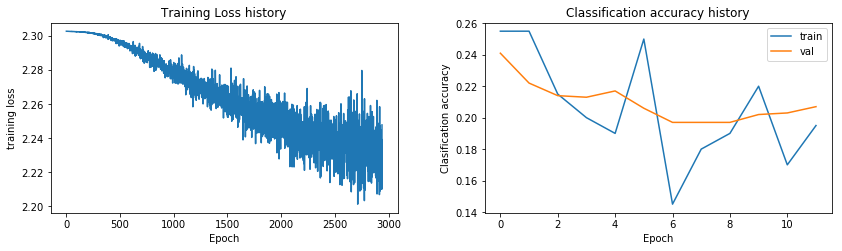

In [51]:
loss, train_acc, val_acc = history_tanh

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

**Expected Results**:

<pre>You should see that although the loss is gradually decreasing, the accuracy has not increased.
It might be caused by too high of learning rate, or the network needs to be trained longer, or it's just that the capacity of the two-layered network is not enough.

---
### c. Training Accuracy
Calculate the train-validation accuracy

In [52]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer(X_train, W_tanh, b_tanh, act_f='tanh')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy =',accuracy*100,'%')

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 20.008163265306123 %
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [6 8 8 6 8 9 6 6 8 9 6 9 8 6 7]


**Expected Output**:

<pre>You should be able to get about <b>~18%</b> accuracy on training set using the initial run

In [53]:
y_pred = predict_multi_layer(X_val, W_tanh, b_tanh, act_f = 'tanh')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy =', accuracy*100,'%')

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 20.7 %
Validation label = [8 9 4 9 0 5 0 8 2 3 7 8 9 4 5]
Predicted label  = [8 9 8 6 6 6 5 8 8 8 6 8 9 5 6]


**Expected Output**:

<pre>You should also be able to get about <b>~20%</b> accuracy on validation set</pre>

You can retrain further the weights by adding the pre-trained `W` and `b` to the arguments when calling training function


---
## 2 - Two Layer ReLU Network 

The next one is two layer net using relu activation function.

Here you should see that the network using **relu** will converge much faster compared to using **tanh**



---
### a. Train Network

#### <font color='red'>**EXERCISE:** </font>

Use the Training Function and train a **one-hidden layer neural network** with **50 hidden neurons**, 

use the same parameter as before in tanh, but now using **relu** activation function


In [54]:
np.random.seed(None)
W_relu, b_relu, history_relu = train_multi_layer(
    X_train, y_train, X_val, y_val, 
    hidden_size=[50], 
    act_f = 'relu',
    std=1e-4, lr=1e-4, 
    lr_decay=0.95, reg=0.01, 
    epochs=12)

start training using relu activation function
iteration 100 (epoch 1 / 12 ): loss = 2.301448018692467
iteration 200 (epoch 1 / 12 ): loss = 2.2769481182799325
iteration 300 (epoch 2 / 12 ): loss = 2.1647935106838356
iteration 400 (epoch 2 / 12 ): loss = 2.0924725753636717
iteration 500 (epoch 3 / 12 ): loss = 2.0757555516600616
iteration 600 (epoch 3 / 12 ): loss = 1.9995121601126598
iteration 700 (epoch 3 / 12 ): loss = 1.9968389605082997
iteration 800 (epoch 4 / 12 ): loss = 1.9315316132984688
iteration 900 (epoch 4 / 12 ): loss = 1.9405668719383222
iteration 1000 (epoch 5 / 12 ): loss = 1.9272757368952362
iteration 1100 (epoch 5 / 12 ): loss = 1.8718871917065252
iteration 1200 (epoch 5 / 12 ): loss = 1.877629531352821
iteration 1300 (epoch 6 / 12 ): loss = 1.9101067240911684
iteration 1400 (epoch 6 / 12 ): loss = 1.8742731896782399
iteration 1500 (epoch 7 / 12 ): loss = 1.7410571283211458
iteration 1600 (epoch 7 / 12 ): loss = 1.7436394035994136
iteration 1700 (epoch 7 / 12 ): loss 

**Expected Output**:
<pre>
loss should starts around 2.3 and ends around 1.7

---
### b. Visualize Training
Visualize the loss, and train-validation accuracy

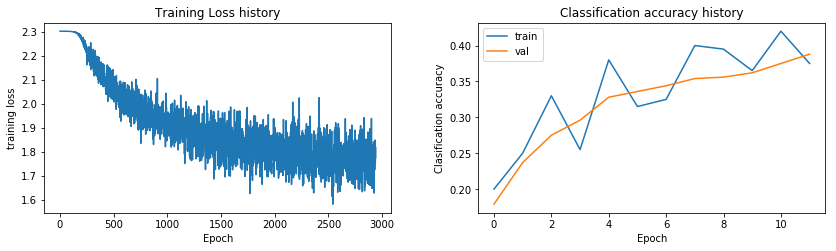

In [55]:
loss, train_acc, val_acc = history_relu

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

**Expected Results**:

<pre>You should see that as the loss is decreasing, the training and validation accuracy keep increasing.
Using relu also shown that it prevents overfitting as the training and validation accuracy is really close.
It means that we can train it longer to achieve even better accuracy.

---
### c. Training Accuracy
Calculate the train-validation accuracy

In [56]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer(X_train, W_relu, b_relu, act_f='relu')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy =',accuracy*100,'%')

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 37.94285714285714 %
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [6 1 9 6 9 9 2 7 0 9 4 7 9 3 7]


**Expected Output**:

<pre>You should be able to get about <b>~39%</b> accuracy on training set using the initial run

In [57]:
y_pred = predict_multi_layer(X_val, W_relu, b_relu, act_f='relu')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy =', accuracy*100,'%')

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 38.800000000000004 %
Validation label = [8 9 4 9 0 5 0 8 2 3 7 8 9 4 5]
Predicted label  = [8 6 8 3 6 6 0 0 7 3 7 9 9 0 2]


**Expected Output**:

<pre>You should also be able to get about <b>~38%</b> accuracy on validation set</pre>

You can retrain further the weights by adding the pre-trained `W` and `b` to the arguments when calling training function


---
## 3 - Comparison
You should already be able to see the comparison, but let's visualize it anyway

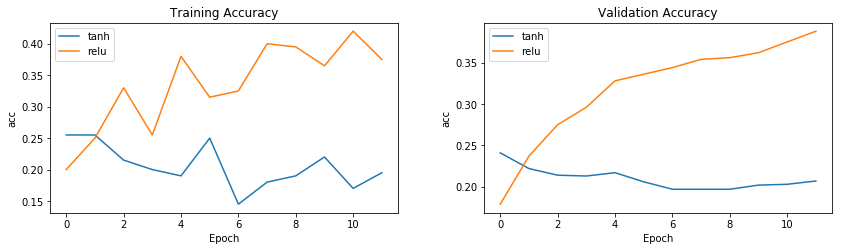

In [58]:
loss_tanh, train_tanh, val_tanh = history_tanh
loss_relu, train_relu, val_relu = history_relu

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(train_tanh, label='tanh')
plt.plot(train_relu, label='relu')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Training Accuracy')

plt.subplot(122)
plt.plot(val_tanh, label='tanh')
plt.plot(val_relu, label='relu')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Validation Accuracy')
plt.show()

**Expected Output**:

You can see that the **relu** network can already learn even if it only uses one layer, while the **tanh** network got stuck and cannot improve

---
***
#[Part 5] Deep Neural Network
* In this part, we'll increase the network capacity by increasing the number of hidden layers
 
* Like before, we'll try both **tanh** and **relu** activation function, then compare the results
 
* And since we're using more layers, we'll train it a little bit longer

---
## 1 - Four Layer Tanh Network 

First one is four layer net using **tanh** activation function



---
### a. Train Network

#### <font color='red'>**EXERCISE:** </font>

Use the Training Function and train a **three-hidden layer neural network** with **50 hidden neurons** each using **tanh** activation function



In [59]:
hidden_size=[50, 50, 50]

W_tanh_4, b_tanh_4, history_tanh_4 = train_multi_layer(
    X_train, y_train, X_val, y_val, 
    hidden_size=hidden_size, 
    act_f = 'tanh',
    std=1e-2, lr=1e-2,
    lr_decay=0.95, reg=0.01, 
    epochs=20)

start training using tanh activation function
iteration 100 (epoch 1 / 20 ): loss = 2.455312594995824
iteration 200 (epoch 1 / 20 ): loss = 2.449361461353765
iteration 300 (epoch 2 / 20 ): loss = 2.4437533525106945
iteration 400 (epoch 2 / 20 ): loss = 2.4385728115851233
iteration 500 (epoch 3 / 20 ): loss = 2.4334881029396302
iteration 600 (epoch 3 / 20 ): loss = 2.4288867944608548
iteration 700 (epoch 3 / 20 ): loss = 2.424245505984101
iteration 800 (epoch 4 / 20 ): loss = 2.4203603056623746
iteration 900 (epoch 4 / 20 ): loss = 2.4167256689702654
iteration 1000 (epoch 5 / 20 ): loss = 2.412399007248959
iteration 1100 (epoch 5 / 20 ): loss = 2.408918660275141
iteration 1200 (epoch 5 / 20 ): loss = 2.4055721827510155
iteration 1300 (epoch 6 / 20 ): loss = 2.402296686760991
iteration 1400 (epoch 6 / 20 ): loss = 2.3994115641997196
iteration 1500 (epoch 7 / 20 ): loss = 2.3963288407378265
iteration 1600 (epoch 7 / 20 ): loss = 2.393786567134884
iteration 1700 (epoch 7 / 20 ): loss = 2.3

**Expected Output**:
<pre>
loss should starts around 2.45 and ends around 2.33

---
### b. Visualize Training
Visualize the loss, and train-validation accuracy

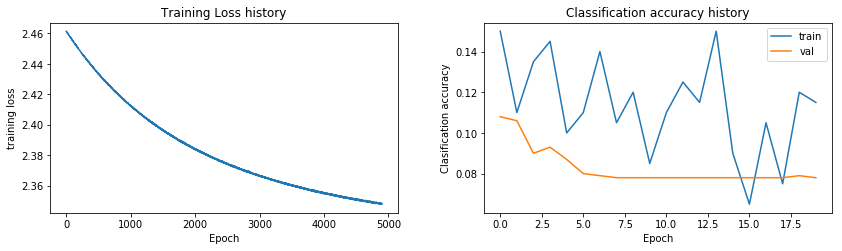

In [60]:
loss, train_acc, val_acc = history_tanh_4

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

**Expected Results**:

<pre>You should see now that the loss is gradually decreasing, and the accuracy is actually increasing compared to two layer tanh.

And it's finally going down after ~4000 iterations

But you can see that it's still not high enough. It means that the network need to be trained much longer.

---
### c. Training Accuracy
Calculate the loss, and train-validation accuracy

In [61]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer(X_train, W_tanh_4, b_tanh_4, act_f='tanh')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy =',accuracy*100,'%')

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 10.044897959183674 %
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


**Expected Output**:

<pre>You should be able to get about <b>~17%</b> accuracy on training set using the initial run

Notice that it's lower than one layer tanh

In [62]:
y_pred = predict_multi_layer(X_val, W_tanh_4, b_tanh_4, act_f = 'tanh')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy =', accuracy*100,'%')

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 7.8 %
Validation label = [8 9 4 9 0 5 0 8 2 3 7 8 9 4 5]
Predicted label  = [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


**Expected Output**:

<pre>You should also be able to get about <b>~18%</b> accuracy on validation set</pre>

You can retrain further the weights by adding the pre-trained `W` and `b` to the arguments when calling training function


---
## 2 - Four Layer ReLU Network 

The next one is four layer net using relu activation function.

You should see major improvement in accuracy when using more layer, aside from that it will also converge much faster compared to using tanh



---
### a. Train Network

#### <font color='red'>**EXERCISE:** </font>

Use the Training Function and train a **three-hidden layer neural network** with **50 hidden neurons** each

use the same parameter as before in **tanh**, but now using **relu** activation function


In [63]:
hidden_size=[50, 50, 50]
W_relu_4, b_relu_4, history_relu_4 = train_multi_layer(
    X_train, y_train, X_val, y_val, 
    hidden_size=hidden_size, 
    act_f = 'relu',
    std=1e-2, lr=1e-2,
    lr_decay=0.95, reg=0.01, 
    epochs=20)

start training using relu activation function
iteration 100 (epoch 1 / 20 ): loss = 2.404201922339375
iteration 200 (epoch 1 / 20 ): loss = 2.2544845698683087
iteration 300 (epoch 2 / 20 ): loss = 2.206100448170693
iteration 400 (epoch 2 / 20 ): loss = 2.058549309705524
iteration 500 (epoch 3 / 20 ): loss = 2.002649735912752
iteration 600 (epoch 3 / 20 ): loss = 1.9503362500929773
iteration 700 (epoch 3 / 20 ): loss = 1.981567180020399
iteration 800 (epoch 4 / 20 ): loss = 1.960461884267574
iteration 900 (epoch 4 / 20 ): loss = 1.9347929873491259
iteration 1000 (epoch 5 / 20 ): loss = 1.888626306266673
iteration 1100 (epoch 5 / 20 ): loss = 1.8965028588875406
iteration 1200 (epoch 5 / 20 ): loss = 1.9335085043362652
iteration 1300 (epoch 6 / 20 ): loss = 1.7856522434974
iteration 1400 (epoch 6 / 20 ): loss = 1.9835020424671275
iteration 1500 (epoch 7 / 20 ): loss = 1.8620153644434299
iteration 1600 (epoch 7 / 20 ): loss = 1.9754860054846988
iteration 1700 (epoch 7 / 20 ): loss = 1.9094

**Expected Output**:
<pre>
loss should starts around 2.45 and ends around 1.39

---
### b. Visualize Training
Visualize the loss, and train-validation accuracy

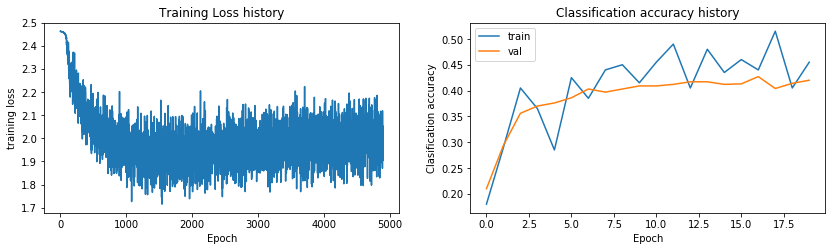

In [64]:
loss, train_acc, val_acc = history_relu_4

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.2)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

**Expected Results**:

<pre>You should see that as the loss is decreasing, the training and validation accuracy keep increasing.
Using relu also shown that it prevents overfitting as the training and validation accuracy is really close.
It means that we can train it longer to achieve even better accuracy.

---
### c. Training Accuracy
Calculate the loss, and train-validation accuracy

In [65]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer(X_train, W_relu_4, b_relu_4, act_f='relu')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy =',accuracy*100,'%')

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 43.5265306122449 %
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [6 1 9 6 8 7 2 7 8 9 4 7 9 3 7]


**Expected Output**:

<pre>You should be able to get about <b>~57%</b> accuracy on training set using the initial run

In [66]:
y_pred = predict_multi_layer(X_val, W_relu_4, b_relu_4, act_f='relu')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy =', accuracy*100,'%')

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 42.0 %
Validation label = [8 9 4 9 0 5 0 8 2 3 7 8 9 4 5]
Predicted label  = [8 7 0 3 6 6 0 8 4 3 7 8 9 8 7]


**Expected Output**:

<pre>You should also be able to get about <b>~52%</b> accuracy on validation set</pre>

You can retrain further the weights by adding the pre-trained `W` and `b` to the arguments when calling training function


---
## 3 - Comparison
You should already be able to see the comparison, but let's visualize it anyway

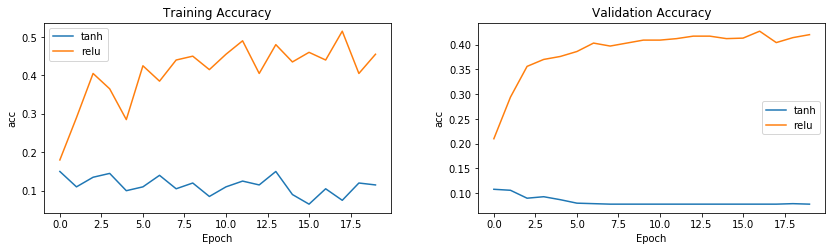

In [67]:
loss_tanh_4, train_tanh_4, val_tanh_4 = history_tanh_4
loss_relu_4, train_relu_4, val_relu_4 = history_relu_4

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(train_tanh_4, label='tanh')
plt.plot(train_relu_4, label='relu')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Training Accuracy')

plt.subplot(122)
plt.plot(val_tanh_4, label='tanh')
plt.plot(val_relu_4, label='relu')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Validation Accuracy')
plt.show()

**Expected Output**:

You can see that the **relu** network converge faster compared to the **tanh** network 

---
Now let's see if we compare all four networks

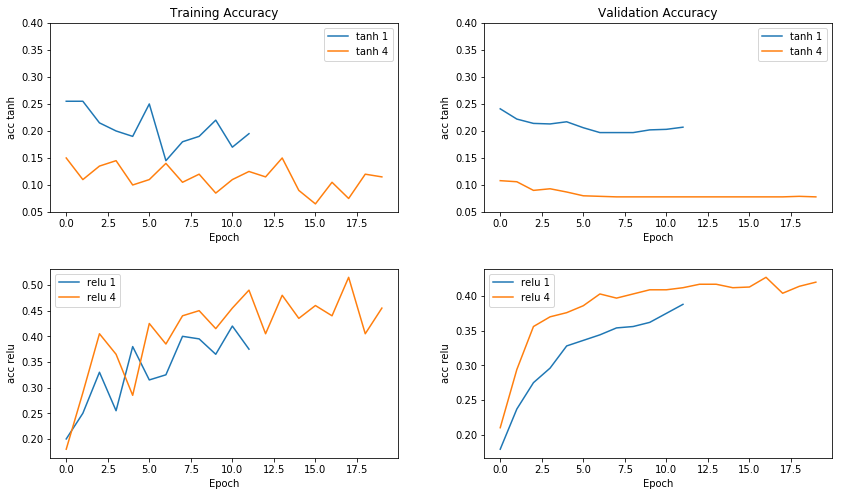

In [68]:
plt.rcParams['figure.figsize'] = [14, 8]
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.3)

plt.subplot(221)
plt.plot(train_tanh, label='tanh 1')
plt.plot(train_tanh_4, label='tanh 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc tanh')
plt.ylim(.05,.4)
plt.title('Training Accuracy')

plt.subplot(222)
plt.plot(val_tanh, label='tanh 1')
plt.plot(val_tanh_4, label='tanh 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc tanh')
plt.ylim(.05,.4)
plt.title('Validation Accuracy')

plt.subplot(223)
plt.plot(train_relu, label='relu 1')
plt.plot(train_relu_4, label='relu 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc relu')

plt.subplot(224)
plt.plot(val_relu, label='relu 1')
plt.plot(val_relu_4, label='relu 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc relu')

plt.show()

**Expected Output**:

You should see that in **relu** case, there's an improvement in accuracy when using more layer,

---
***
# [Part 6] Batch Normalization

* One way to make deep networks easier to train is to use more sophisticated and advanced optimization procedures such as SGD+momentum, RMSProp, or Adam. Now we will talk about them later in the class.

* Another strategy is to change the architecture of the network to make it easier to train. 
One idea along these lines is batch normalization which was proposed by [[1]](https://arxiv.org/abs/1502.03167) in 2015.

<br>

* The idea is relatively straightforward. Machine learning methods tend to work better when their input data consists of uncorrelated features with zero mean and unit variance. When training a neural network, we can preprocess the data before feeding it to the network to explicitly decorrelate its features; this will ensure that the first layer of the network sees data that follows a nice distribution. 

* However, even if we preprocess the input data, the activations at deeper layers of the network will likely no longer be decorrelated and will no longer have zero mean or unit variance since they are output from earlier layers in the network. Even worse, during the training process the distribution of features at each layer of the network will shift as the weights of each layer are updated.

<br>

* Now let's see the result of Deep Network without Batch Normalization

[1] [Sergey Ioffe and Christian Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift", ICML 2015.](https://arxiv.org/abs/1502.03167)

---
## 1 - Weight Distribution without BatchNorm

Let's build a `5-Layered Neural Network` with 500 hidden neuron each. Then we feed a random data. 

You'll see that the activation distribution for each layer will plummet as the activation in each layer are not zero-centered

In [0]:
Hs = {}
X = np.random.randn(1000, 500)

d_in =500
hidden=[500, 500, 500, 500]
d_out=500
W, b = init_weights(d_in, hidden, d_out)

a = X
for i in range(len(W)):
    z, _ = affine_forward(a, W[i], b[i])
    a, _ = tanh_forward(z)
    Hs[i] = a

Now let's see the activation distribution as we calculate the forward pass

input layer had meann 0.001591 and std 1.000861
hidden layer 1 had mean -0.000158 and std 0.213229
hidden layer 2 had mean 0.000015 and std 0.047494
hidden layer 3 had mean 0.000013 and std 0.010573
hidden layer 4 had mean 0.000003 and std 0.002360
hidden layer 5 had mean -0.000001 and std 0.000529



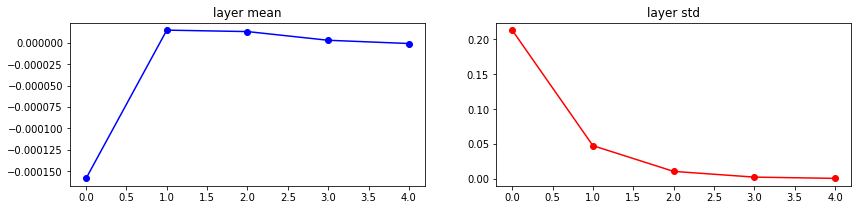



Activation Distribution


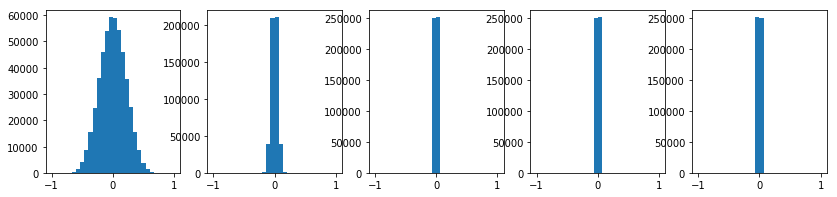

In [70]:
print('input layer had meann %f and std %f' % (np.mean(X), np.std(X)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print ('hidden layer %d had mean %f and std %f' % (i + 1, layer_means[i], layer_stds[i]))

print()
plt.figure(figsize=(14,3))
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()


print('\n\nActivation Distribution')
plt.figure(figsize=(14,3))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
plt.show()

---
##2 - BatchNorm Forward (Math)

* The authors of [1] hypothesize that the shifting distribution of features inside deep neural networks may make training deep networks more difficult. To overcome this problem, [1] proposes to insert batch normalization layers into the network. At training time, a batch normalization layer uses a minibatch of data to estimate the mean and standard deviation of each feature. 
* These estimated means and standard deviations are then used to center and normalize the features of the minibatch.
<br>

* It is possible that this normalization strategy could reduce the representational power of the network, since it may sometimes be optimal for certain layers to have features that are not zero-mean or unit variance. 
* To this end, the batch normalization layer includes learnable shift and scale parameters for each feature dimension.

<br>

You can see in [here](http://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html) to get the basic idea of how forward and backward pass in Batch Normalization is done

![batchnorm](http://kratzert.github.io/images/bn_backpass/BNcircuit.png)

---

### a. Forward Train in Steps
For the convenience in calculating Batch Norm Backward Pass, we split the forward implementation into **9 steps** to get all the necessary intermediate value

See the table below to track the steps

<table>
    <tr align='left'>
        <td>(1) Mini-batch Mean</td>
        <td>|<br>|</td>
        <td align='left'>
        $$
        \begin{align}
        \mu B = \frac{1}{N} \sum\limits_{i=1}^{N} x_i \\
        \end{align}
        $$</td>
        <td>|<br>|</td>
        <td>
        $$
        \begin{align}
        mu = \frac{1}{N} * sum( x ) \\
        \end{align}
        $$</td>
    </tr>
    <tr align='left'>
        <td>(2-4) Mini-batch Variance</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align*}        
        \sigma^2_B = \frac{1}{N} \sum\limits_{i=1}^{N}(x_i-\mu B)^2\\
        \end{align*}
        $$</td>
        <td>|<br>|</td>
        <td align="left">    
        $$
        \begin{align}
        xmu & = x-mu\\
        xmq & = xmu^2 \\
        variance & = \frac{1}{N} * sum( xmq )\\
        \end{align}
        $$</td>
    </tr>
    <tr align="left">
        <td>(5-7) Normalize</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align*}        
        \widehat{x_i} & = \frac{x_i-\mu B}{\sqrt{\sigma^2_B+\epsilon}}
        \end{align*}
        $$</td>
        <td>|<br>|</td>
        <td align="left">    
        $$
        \begin{align}
        sqrt\_var & = \sqrt{variance + \epsilon}\\
        inv\_var & = \frac{1}{sqrt\_var}\\
        x\_norm & = xmu * inv\_var\\
        \end{align}
        $$</td>
    </tr>
    <tr align="left">
        <td>(8-9) Scale and Shift</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align*}        
        y_i & = \gamma\widehat{x_i}+\beta
        \end{align*}
        $$</td>
        <td>|<br>|</td>
        <td align="left">           
        $$
        \begin{align*}        
        x\_gamma & = gamma*x\_norm\\
        out & = x\_gamma+beta
        \end{align*}
        $$</td>
    </tr>
</table>

---
### b. Running Average and Variance

BatchNorm estimated means and standard deviations of all training data based on current batch of data. But the minibatch may not represent all training data. 

To compensate this, a running average of these means and standard deviations is kept during training, and at test time these running averages are used to center and normalize features.
      
<table>
    <tr align="left">
        <td>Running Mean</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align}
        M\mu B =\ & m * M\mu B\\ & +(1-m)*\mu B\\
        \end{align}
        $$</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align}
        rn\_mean =\ & momentum * rn\_mean \\& +(1-momentum)*mu\\
        \end{align}
        $$</td>
    </tr>
    <tr align="left">
        <td>Running Variance</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align}
        M\sigma^2_B =\ & m * M\sigma^2_B\\& +(1-m)*\sigma^2_B\\
        \end{align}
        $$</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align}
        rn\_var =\ & momentum * rn\_var\\& +(1-momentum)*var\\
        \end{align}
        $$</td>
    </tr>
</table>

---
### c. Forward Testing
At test time, BatchNorm will scale and shift the batch of testing data using the final running mean and running average acieved during training

      
<table>
    <tr align=left>
        <td>Calculate Normalized $x$<br> based on running mean and variance</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align}
        \widehat{x_i} & = \frac{x_i-M\mu B}{\sqrt{M\sigma^2_B+\epsilon}} \\
        \end{align}
        $$</td>
    </tr>
    <tr align=left>
        <td>Scale and Shift</td>
        <td>|<br>|</td>
        <td align="left">
        $$
        \begin{align}
        y_i & = \gamma\widehat{x_i}+\beta
        \end{align}
        $$</td>
    </tr>
</table>

---
##3 - BatchNorm Forward API

---
### a. Forward Function
Now implement both the maths of training and testing batchnorm above in a complete forward function

---

#### <font color='red'>**EXERCISE:** </font>

**Implement Batch Norm Forward Pass**


      

In [0]:
def batchnorm_forward(x, gamma, beta, bn_arg):
    """
    Proses Forward Pass untuk Batch Normalization.
    
    Inputs:
    - x             : input matrix data berukuran (N, D)
    - gamma         : vektor parameter skala (scale parameter) berukuran (D,)
    - beta          : vektor parameter pergeseran (shift paremeter) berukuran (D,)
    - bn_arg        : Dictionary berisi parameter-parameter perhitungan dengan indeks keys sbb:
      - mode        : 'train' atau 'test'; mode proses yang dapat dipilih; required
      - eps         : konstanta untuk menjaga stabilitas nilai perhitungan (numerical stability)
      - momentum    : konstanta untuk perhitungan running mean / variance.
      - running_mean: Array berukuran (D,) berisi nilai running mean dari fitur input
      - running_var : Array berukuran (D,) berisi nilai running variance dari fitur input

    Return sebuah tuple berisi:
    - out   : matrix output berukuran (N, D)
    - cache : sebuah tuple berisi nilai-nilai yang dibutuhkan untuk backward pass
    """
    
    mode     = bn_arg['mode']
    eps      = bn_arg.get('eps', 1e-5)
    momentum = bn_arg.get('momentum', 0.9)

    N, D         = x.shape
    running_mean = bn_arg.get('running_mean', np.zeros(D, dtype=x.dtype))
    running_var  = bn_arg.get('running_var', np.zeros(D, dtype=x.dtype))

    out, cache = None, None
    if mode == 'train':
        
        # Step 1: calculate mu, use np.sum with axis=0
        # resulting shape of mu (D,)
        mu = np.sum(x, axis=0)/N

        # Step 2: mean center x
        # resulting shape of var (N,D)
        xmu = x - mu

        # Step 3: calculate square of mean center
        # resulting shape of xmq (N,D)
        xmq = xmu**2

        # Step 4: calculate variance, use np.sum with axis=0
        # resulting shape of var (D,)
        var = np.sum(xmq)/N

        # Step 5: calculate square root of variance, 
        # add epsilon to prevent division by zero
        # resulting shape sqrt_var (D,)
        sqrt_var = np.sqrt(var+eps)

        # Step 6: calculate inverse sqrt_var
        # resulting shape inv_var (D,)
        inv_var = 1/sqrt_var
        
        # Step 7: normalize x        
        # resulting shape x_norm (N,D)
        x_norm = xmu*inv_var

        # Step 8: scale (multiply) x_norm by gamma
        # resulting shape out (N,D)
        x_gamma = gamma*x_norm
        
        # Step 9: shift (add) x_gamma by beta
        # resulting shape out (N,D)
        out = x_gamma+beta
        

        # Step 10: calculate running mean and average
        running_mean = momentum*running_mean + (1-momentum)*mu
        running_var  = momentum*running_var + (1-momentum)*var
        
        # store the necessary intermediate
        cache = (mu, xmu, xmq, var, sqrt_var, inv_var, x_norm, x_gamma, gamma, beta, x,  bn_arg)

    elif mode == 'test':
        running_mean = bn_arg['running_mean']
        running_var = bn_arg['running_var']
        
        # Step 1: normalize x   
        # subtract by running_mean, 
        # and divide by square root of running_var (add epsilon to prevent division by zero)
        # resulting shape x_norm (N,D)
        x_norm = (x - running_mean) / np.sqrt(running_var + eps)
                
        # Step 2: Scaly by gamma and shift by beta
        # resulting shape out (N,D)
        out = gamma * x_norm + beta
        
    else:
        raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

    # Store the updated running means back into bn_arg
    bn_arg['running_mean'] = running_mean
    bn_arg['running_var']  = running_var

    return out, cache


---
### b. Check BatchNorm Forward Train
Check your implementation

In [72]:
np.random.seed(35)
N = 200
d_in =50
hidden=[60]
d_out=3

W, b = init_weights(d_in, hidden, d_out, std=1, seed=35)
x = np.random.randn(N, d_in)
a = np.maximum(0, x.dot(W[0])).dot(W[1])

print('Before batch normalization:')
print('  means: ', a.mean(axis=0))
print('  stds : ', a.std(axis=0))

Before batch normalization:
  means:  [-32.913745   14.1273126  -7.7720162]
  stds :  [40.1508681 37.4447318 33.7706377]


**Expected result**:
<pre>Before batch normalization:
  means:  [-32.913745   14.1273126  -7.7720162]
  stds :  [40.1508681 37.4447318 33.7706377]

In [73]:
# Nilai rata-rata (means) seharusnya mendekati 0
# dan standar deviasi (stds) mendekati 1

print('After batch normalization (gamma=1, beta=0)')
a_norm, _ = batchnorm_forward(a, np.ones(d_out), np.zeros(d_out), {'mode': 'train'})
print('  mean: ', a_norm.mean(axis=0))
print('  std : ', a_norm.std(axis=0))


After batch normalization (gamma=1, beta=0)
  mean:  [ 2.8920009e-16 -8.6042284e-17  7.5495166e-17]
  std :  [0.622913  0.5809292 0.5239281]


**Expected result**:
<pre>After batch normalization (gamma=1, beta=0)
  mean:  [ 4.7910894e-16 -1.4765966e-16  1.6459056e-16]
  std :  [1. 1. 1.]


Check with different `gamma` and `beta` for each dimension

In [74]:
# Kini nilai rata-rata (means) seharusnya mendekati nilai beta
# dan standar deviasi (stds) mendekati gamma

gamma = np.asarray([1.0, 2.0, 3.0])
beta = np.asarray([11.0, 12.0, 13.0])
a_norm, _ = batchnorm_forward(a, gamma, beta, {'mode': 'train'})
print ('After batch normalization (nontrivial gamma, beta)')
print ('  means: ', a_norm.mean(axis=0))
print ('  stds : ', a_norm.std(axis=0))

After batch normalization (nontrivial gamma, beta)
  means:  [11. 12. 13.]
  stds :  [0.622913  1.1618583 1.5717844]


**Expected result**:
<pre>After batch normalization (nontrivial gamma, beta)
  means:  [11. 12. 13.]
  stds :  [1. 2. 3.]

---
### c. Check BatchNorm Forward Test
Check forward pass in batchnorm in testing-time. First run forward batchnorm training several times to warm up (accumulate) the running mean and variance, then check the testing activation

In [0]:
# Periksa proses forward pass pada saat testing-time dengan menjalankan
# proses forward pass training beberapa kali untuk mengakumulasi nilai
# running average, kemudian periksa hasil nilai aktivasi means dan varians
# setelah proses forward pass testing-time

np.random.seed(45)
W, b = init_weights(d_in, hidden, d_out, std=1, seed=45)

gamma = np.ones(d_out)
beta = np.zeros(d_out)
    
bn_arg = {'mode': 'train'}    
for t in range(50):
    x = np.random.randn(N, d_in)
    a = np.maximum(0, x.dot(W[0])).dot(W[1])
    batchnorm_forward(a, gamma, beta, bn_arg)

switch batchnorm to testing

In [76]:
bn_arg['mode'] = 'test'

np.random.seed(45)
x = np.random.randn(N, d_in)
a = np.maximum(0, x.dot(W[0])).dot(W[1])
a_norm, _ = batchnorm_forward(a, gamma, beta, bn_arg)

# Hasil nilai rata-rata (means) harusnya akan berkisar nol,
# dan nilai standar deviasi (std) harusnya berkisar satu
# namun akan terlihat bernilai lebih "kasar" (noisy)
# dibandingkan hasil mean dan std pada saat forward pass training-time
print ('After batch normalization (test-time):')
print ('  means: ', a_norm.mean(axis=0))
print ('  stds : ', a_norm.std(axis=0))

After batch normalization (test-time):
  means:  [0.0028939 0.0208287 0.0813795]
  stds :  [0.6452798 0.4672457 0.5799739]


**Expected result**:
<pre>After batch normalization (test-time):
  means:  [0.0044162 0.0420161 0.1427807]
  stds :  [0.9847371 0.9425361 1.0175674]

---
## 4 - BatchNorm Backward (Math)

Again, let's see the gradient flow of Batch Normalization

![batchnorm](http://kratzert.github.io/images/bn_backpass/BNcircuit.png)

---
### a. BatchNorm Backward Pass
From the intermediate values, we backtrack using chain rule to calculate the gradient of `x`, `gamma`, and `beta`

The full implementation of Batch Norm Gradient is as follow:


<table width=700>
  <tr>
    <td width=100>$$\begin{align*} \partial\beta & = \end{align*} $$</td>
    <td>$$
\begin{align*}     
\sum\limits_{i=1}^N\partial out 
\end{align*}$$</td>
  </tr>
  <tr>
    <td>$$\begin{align*} \partial\gamma & = \end{align*} $$ </td>
    <td>$$
\begin{align*}     
\sum\limits_{i=1}^N\partial out * \widehat{x_i}
\end{align*}$$</td>
  </tr>
  <tr>
    <td>$$\begin{align*} \partial x_i = \end{align*} $$ </td>
    <td>$$\begin{align*}  
\frac{\gamma}{N*\sqrt{\sigma^2_B+\epsilon}} * \Bigg( \big(N*\partial out\big) - \left(\sum\limits_{i=1}^{N}\partial out\right)-\left(\frac{x_i-\mu B}{\sigma^2_B+\epsilon}*\sum\limits_{i=1}^{N}\big(\partial out*(x_i-\mu B)\big)\right)\Bigg)
\end{align*}
$$</td>
  </tr>
</table>


---

### b. BatchNorm Backward in Steps
But for convenience, we split the implementation, match to the forward pass, into `9 steps`

See the table below to track the steps

<table>
    <tr align="left">
        <td>(9) Scale and Shift</td>
        <td>|<br>|<br>|<br>|<br>|<br>|</td>
        <td align='center'>
        $$
        \begin{align*}     
        \partial\beta & = \sum\limits_{i=1}^N\partial out   \\
        \partial\gamma & = \sum\limits_{i=1}^N(\partial out * \widehat{x_i})\\
        \end{align*}
        $$</td>
        <td>|<br>|<br>|<br>|<br>|<br>|</td>
        <td align="left">           
        $$
        \begin{align*}        
        & dbeta & = & \ \ sum(dout) \\\\
        & dgamma & = & \ \ sum(x\_norm * dout)
        \end{align*}
        $$</td>
    </tr>
    <tr align="left">
        <td>(6-8) Normalize</td>
        <td>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|</td>
        <td align="left">
        $$
        \begin{align*} 
        \\
		\partial\widehat{x_i} & = \gamma * \partial out\\
		\\
		\partial\left(\frac{1}{\sqrt{\sigma^2 B+\epsilon}}\right) & = \sum\limits_{i=1}^{N}( (x_i-\mu B) * \partial\widehat{x_i} )\\
		\\
		\partial(x_i-\mu B) & = \frac{1}{\sqrt{\sigma^2_B+\epsilon}}*\partial\widehat{x_i}\\
		\partial\left(\sqrt{\sigma^2 B+\epsilon}\right) & = -\frac{1}{\sigma^2_B+\epsilon}* \partial\left(\frac{1}{\sqrt{\sigma^2_B+\epsilon}}\right)
        \end{align*}
        $$</td>
        <td>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|</td>
        <td align="left">    
        $$
        \begin{align*}
		& dx\_norm & = & \ \ gamma * dout\\\\
		& dinv\_var & = & \ \ sum( xmu * dx\_norm )\\\\
		& dxmu & = & \ \ inv\_var * dx\_norm\\\\
		& dsqrt\_var & = & \ \ \frac{-1}{ sqrt\_var^2} * dinv\_var
        \end{align*}
        $$</td>
    </tr>
    <tr align="left">
        <td>(3-5) Mini-batch Variance</td>
        <td>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|</td>
        <td align="left">
        $$
        \begin{align*} 
        \\
		\partial\left(\sigma^2_B\right) =\ \ & \frac{1}{2\sqrt{\sigma^2_B + \epsilon}} *  \partial\left(\sqrt{\sigma^2 B+\epsilon}\right)\\
		\\
		\partial \big((x_i-\mu B)^2\big) =\ \ & \frac{1}{N} * \partial\left(\sigma^2_B\right)\\
		\\
		\partial(x_i-\mu B) =\ \ & \partial (x_i-\mu B) +  2 * (x_i-\mu B)\\\\& * \partial \big((x_i-\mu B)^2\big)\\\\
        \end{align*}
        $$</td>
        <td>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|<br>|</td>
        <td align="left">    
        $$
        \begin{align*}
		& dvar & = &\ \ \frac{1}{2 \sqrt{var + \epsilon}}  * dsqrt\_var\\\\
		& dxmq & = &\ \ \frac{1}{N} * temp_{xmq} * dvar\\\\
		& dxmu & = &\ \ dxmu + 2 * xmu * dxmq
        \end{align*}
        $$</td>
    </tr>
    <tr align=left>
        <td>(1-2) Mini-batch Mean</td>
        <td>|<br>|<br>|<br>|<br>|<br>|</td>
        <td align="left">
        $$
        \begin{align*}
		\partial\mu B & = -\sum\limits_{i=1}^{N}\left(\partial(x_i-\mu B)\right)\\\\
		\partial x_i & = \partial(x_i-\mu B) + \frac{1}{N} *  \partial\mu B
        \end{align*}
        $$</td>
        <td>|<br>|<br>|<br>|<br>|<br>|</td>
        <td>
        $$
        \begin{align*}
		& dmu & = &\ \ -sum(dxmu)\\\\
		& dx & = &\ \ dxmu + \frac{1}{N} * temp_{dx} * dmu
        \end{align*}
        $$</td>
    </tr>
</table>
      

---
## 5 - BatchNorm Backward API

---
### a. Backward Function
Now implement the maths above in a complete backward function

---
#### <font color='red'>**EXERCISE:** </font>

**Implement Batch Norm Backward pass**

In [0]:
def batchnorm_backward(dout, cache):
    """
    Proses Backward Pass untuk Batch Normalization

    Input:
    - dout: Turunan loss dari layer setelahnya, matrix berukuran (N, D)
    - cache: variabel berisi nilai intermediate dari fungsi batchnorm_forward.

    Returns sebuah tuple berisi:
    - dx: matrix gradient terhadap input x, berukuran (N, D)
    - dgamma: vektor gradient terhadap parameter skala gamma, berukuran (D,)
    - dbeta: vektor gradient terhadap parmeter shift beta, berukuran(D,)
    """
    dx, dgamma, dbeta = None, None, None
    
       
    mu, xmu, xmq, var, sqrt_var, inv_var, x_norm, x_gamma, gamma, beta, x, bn_arg = cache
    N, D = dout.shape
    eps = bn_arg.get('eps', 1e-5)
    

    # Backprop Step 9
    # use np.sum with axis=0
    dbeta = np.sum(dout, axis=0)
    dgamma = np.sum(x_norm*dout, axis=0)

    # Backprop step 8
    dx_norm = gamma*dout

    # Backprop step 7
    # use np.sum with axis=0
    dxmu = inv_var*dx_norm
    dinv_var = np.sum(xmu*dx_norm, axis=0)

    # Backprop step 6
    dsqrt_var = (-1/(sqrt_var**2))*dinv_var

    # Backprop step 5
    dvar = (1/2*np.sqrt(var+eps))*dsqrt_var

    # Backprop step 4
    temp_xmq = np.ones((xmq.shape))
    dxmq = (temp_xmq*dvar)/N

    # Backprop step 3
    dxmu = dxmu + 2*xmu*dxmq

    # Backprop step 2
    # use np.sum with axis=0
    dmu = -np.sum(dxmu, axis=0)

    # Basckprop step 1
    temp_dx = np.ones((dxmu.shape))
    dx = dxmu + (temp_dx*dmu)/N


    return dx, dgamma, dbeta

---
### b. Check BatchNorm Backward
Check your implementation

In [78]:
N, D = 4, 5

np.random.seed(20)
x = 5 * np.random.randn(N, D) + 12
gamma = np.random.randn(D)
beta = np.random.randn(D)
dout = np.random.randn(N, D)


bn_arg = {'mode': 'train'}
_, cache = batchnorm_forward(x, gamma, beta, bn_arg)
dx, dgamma, dbeta = batchnorm_backward(dout, cache)


print('dx\n',dx)
print('\ndgamma\n',dgamma)
print('\ndbeta\n',dbeta)

dx
 [[-1.5944750e-02  3.8689165e-01 -9.2473497e-01 -4.2336104e+00
  -3.8582159e-03]
 [ 1.5163582e-02 -3.8464242e-02  3.0983404e+00  1.9112176e+00
   5.8902459e-02]
 [ 6.3187154e-03 -1.8917868e-01  2.6066862e+00 -9.3860280e-01
  -5.1248085e-02]
 [-5.5375477e-03 -1.5924873e-01 -4.7802917e+00  3.2609956e+00
  -3.7961586e-03]]

dgamma
 [-0.2692952  0.0382953  2.3046457 -1.346196   0.1271641]

dbeta
 [-2.2437568  0.1814855  0.1372466  5.138691  -0.0726342]


**Expected Output**: 
<pre>dx
 [[-0.0649239  1.4176637  0.122448   0.0091537  0.0518538]
 [ 0.1267    -0.5254938 -0.1093556 -0.1241527  0.072954 ]
 [ 0.0212493 -0.3930962  0.0552021  0.019523  -0.0458642]
 [-0.0830254 -0.4990737 -0.0682945  0.095476  -0.0789436]]
<br>dgamma
 [-2.094374   0.1425473  4.3629382 -1.9807797  0.308084 ]
<br>dbeta
 [-2.2437568  0.1814855  0.1372466  5.138691  -0.0726342]

---
## 6 - Weight Distribution with BatchNorm

Let's try again feeding `5-Layered Neural Network` with 500 hidden neuron each 1000 random data. But now, we'll use Batch Normalization in each after affine layer.


In [0]:
Hs = {}
X = np.random.randn(1000, 500)

d_in =500
hidden=[500, 500, 500, 500]
d_out=500

W, b = init_weights(d_in, hidden, d_out)
gamma = np.ones(d_in)
beta = np.zeros(d_in)
bn_arg = {'mode': 'train'}

a = X
for i in range(len(W)):
    z, _  = affine_forward(a, W[i], b[i])
    zn, _ = batchnorm_forward(z, gamma, beta,  bn_arg)
    a, _  = tanh_forward(zn)
    Hs[i] = a

You'll see that the activation distribution for each layer now much more stable and centered compared to before

input layer had meann 0.002570 and std 1.000617
hidden layer 1 had mean -0.000000 and std 0.044632
hidden layer 2 had mean -0.000000 and std 0.044627
hidden layer 3 had mean -0.000000 and std 0.044627
hidden layer 4 had mean 0.000000 and std 0.044626
hidden layer 5 had mean -0.000000 and std 0.044626



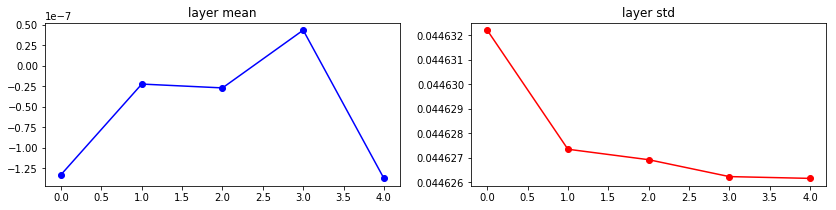



Activation Distribution


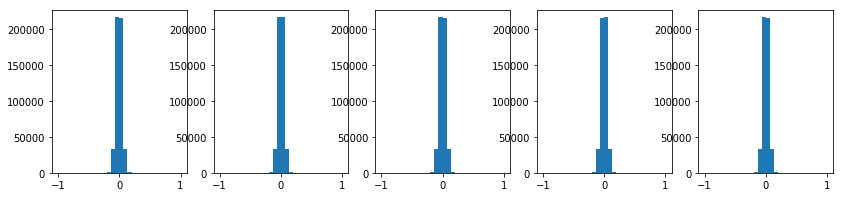

In [80]:
print('input layer had meann %f and std %f' % (np.mean(X), np.std(X)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print ('hidden layer %d had mean %f and std %f' % (i + 1, layer_means[i], layer_stds[i]))

print()
plt.figure(figsize=(14,3))
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')
plt.show()


print('\n\nActivation Distribution')
plt.figure(figsize=(14,3))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
plt.show()

---
## 7 - Batch Normalization Fast Backward
When calculating gradient in backward pass, there are two ways to implement it. One strategy is to write out a computation graph composed of simple operations and backprop through all intermediate values. Another strategy is to work out the derivatives on paper. For example, you can derive a very simple formula for the sigmoid function's backward pass by simplifying gradients on paper.


As shown before, if you're careful when deriving the formula, you'll get the full implementation of Batch Norm Gradient as follow:

<br>

<table width=700>
  <tr>
    <td width=100>$$\begin{align*} \partial\beta & = \end{align*} $$</td>
    <td>$$
\begin{align*}     
\sum\limits_{i=1}^N\partial out 
\end{align*}$$</td>
  </tr>
  <tr>
    <td>$$\begin{align*} \partial\gamma & = \end{align*} $$ </td>
    <td>$$
\begin{align*}     
\sum\limits_{i=1}^N\partial out * \widehat{x_i}
\end{align*}$$</td>
  </tr>
  <tr>
    <td>$$\begin{align*} \partial x_i = \end{align*} $$ </td>
    <td>$$\begin{align*}  
\frac{\gamma}{N*\sqrt{\sigma^2_B+\epsilon}} * \Bigg( \big(N*\partial out\big) - \left(\sum\limits_{i=1}^{N}\partial out\right)-\left(\frac{x_i-\mu B}{\sigma^2_B+\epsilon}*\sum\limits_{i=1}^{N}\big(\partial out*(x_i-\mu B)\big)\right)\Bigg)
\end{align*}
$$</td>
  </tr>
</table>

<br>

Implementing the simplified batch normalization backward pass should compute nearly identical results, but the alternative implementation should be a bit faster.

Below is the implementation of faster batch normalization backward pass

In [0]:
def batchnorm_backward_fast(dout, cache):
    """
    Proses Backward Pass untuk Batch Normalization

    Input:
    - dout: Turunan loss dari layer setelahnya, matrix berukuran (N, D)
    - cache: variabel berisi nilai intermediate dari fungsi batchnorm_forward.

    Returns sebuah tuple berisi:
    - dx: matrix gradient terhadap input x, berukuran (N, D)
    - dgamma: vektor gradient terhadap parameter skala gamma, berukuran (D,)
    - dbeta: vektor gradient terhadap parmeter shift beta, berukuran(D,)
    """
    dx, dgamma, dbeta = None, None, None
    
       
    mu, xmu, xmq, var, sqrt_var, inv_var, x_norm, x_gamma, gamma, beta, x, bn_arg = cache
    N, D = dout.shape
    eps = bn_arg.get('eps', 1e-5)
    
    dbeta = np.sum(dout, axis=0) 
    dgamma = np.sum(dout * x_norm, axis=0)
    N = x.shape[0]
    dx = 1/N * gamma * (var + eps)**-0.5 * (N * dout - np.sum(dout, axis=0) - (x - mu) * (var + eps)**-1 * np.sum(dout * (x - mu), axis=0))

    return dx, dgamma, dbeta

---
### a. Check BatchNorm Fast Backward

In [82]:
N, D = 4, 5

np.random.seed(20)
x = 5 * np.random.randn(N, D) + 12
gamma = np.random.randn(D)
beta = np.random.randn(D)
dout = np.random.randn(N, D)

bn_arg = {'mode': 'train'}
_, cache = batchnorm_forward(x, gamma, beta, bn_arg)
dx, dgamma, dbeta = batchnorm_backward_fast(dout, cache)


print('dx\n',dx)
print('\ndgamma\n',dgamma)
print('\ndbeta\n',dbeta)

dx
 [[ 0.0054358  0.3798779  0.0931858  0.0604368  0.0228105]
 [ 0.0183369 -0.1578004 -0.1486917 -0.1098959  0.0285083]
 [-0.0037751 -0.0920764 -0.0450983  0.0254402 -0.0171302]
 [-0.0199976 -0.1300011  0.1006042  0.0240189 -0.0341886]]

dgamma
 [-0.2692952  0.0382953  2.3046457 -1.346196   0.1271641]

dbeta
 [-2.2437568  0.1814855  0.1372466  5.138691  -0.0726342]


**Expected Output**: 
<pre>dx
 [[-0.0649239  1.4176637  0.122448   0.0091537  0.0518538]
 [ 0.1267    -0.5254938 -0.1093556 -0.1241527  0.072954 ]
 [ 0.0212493 -0.3930962  0.0552021  0.019523  -0.0458642]
 [-0.0830254 -0.4990737 -0.0682945  0.095476  -0.0789436]]
<br>dgamma
 [-2.094374   0.1425473  4.3629382 -1.9807797  0.308084 ]
<br>dbeta
 [-2.2437568  0.1814855  0.1372466  5.138691  -0.0726342]

---
### b. Compare BatchNorm Backward Implementations

In [0]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [84]:
import time

np.random.seed(231)
N, D = 10000, 500
x = 5 * np.random.randn(N, D) + 12
gamma = np.random.randn(D)
beta = np.random.randn(D)
dout = np.random.randn(N, D)

bn_arg = {'mode': 'train'}
out, cache = batchnorm_forward(x, gamma, beta, bn_arg)

t1 = time.time()
dx1, dgamma1, dbeta1 = batchnorm_backward(dout, cache)
t2 = time.time()
dx2, dgamma2, dbeta2 = batchnorm_backward_fast(dout, cache)
t3 = time.time()

print('dx difference        :', rel_error(dx1, dx2))
print('dgamma difference    :', rel_error(dgamma1, dgamma2))
print('dbeta difference     :', rel_error(dbeta1, dbeta2))
print('speed backward normal:',t2-t1,'seconds')
print('speed backward fast  :',t3-t2,'seconds')
print('speedup              : %.2fx' % ((t2 - t1) / (t3 - t2)))

dx difference        : 1.0
dgamma difference    : 0.0
dbeta difference     : 0.0
speed backward normal: 0.14913034439086914 seconds
speed backward fast  : 0.12051725387573242 seconds
speedup              : 1.24x


---
***
# [Part 7] Deep Neural Net with BatchNorm
Now let's build a deeper network using Batch Normalization to classify CIFAR-10 data

---
## 1 - Predict Function

Add the Batch Norm to the predict function 

<br>

The network architecture should be: 
<pre><b>Input - <font color="blue">N * [FC - BN - activation]</font> - FC Layer - argmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**




#### <font color='red'>**EXERCISE:** </font>

Implement Predict Function

    * loop call forward function for each hidden layer weights
    * call forward function for the last layer

In [0]:
def predict_multi_layer_bn(X, W, b, bn_params, act_f ='tanh'):    
    """
    Inputs:
    - X        : Input data, of shape(N, D)
    - W        : list of Weight
    - b        : list of biases
    - bn_params: list of batchnorm args
    - act_f    : activation function ('tanh' or 'relu')
    
    Output:
    - y_pred : list of class prediction
    """
    
    
    gamma, beta, bn_args = bn_params
    y_pred = np.zeros(X.shape[1])
    n_layer = len(W)
        
    # first activation is X
    act = X
    
    ## ------------------------- start your code here -------------------------
    
    # loop i over n_layer-1
    for i in range(n_layer-1):
    
        # calculate layer score by calling affine forward function using act, W[i], and b[i]
        layer, _ = affine_forward(act, W[i], b[i])  
  
        # perform batch normalization by calling batchnorm forward function using 
        # layer output score, gamma[i], beta[i], and bn_args[i]        
        bn_args[i]['mode'] = 'test'
        norm_layer, _ = batchnorm_forward(layer, gamma[i], beta[i], bn_args[i])
        bn_args[i]['mode'] = 'train'
  
        if ( act_f == 'tanh'):
            # calculate activation score by calling tanh forward function using norm_layer output
            act, _ = tanh_forward(norm_layer)
          
        else:
            # calculate activation score by calling relu forward function using norm_layer output
            act, _ = relu_forward(norm_layer)
          

    # calculate last layer score by calling affine forward function using act, W[-1], and b[-1]
    last_layer, _ = affine_forward(act, W[-1], b[-1])
    
    # use np.argmax with axis=-1 
    y_pred = np.argmax(last_layer, axis=-1)

    ## ------------------------- end your code here -------------------------
    
    return y_pred


---
## 2 - Training Function

Now let's add the Batch Norm to the training function


<br>

The network architecture should be: 
<pre><b>Input - <font color="blue">N * [FC - BN - activation]</font> - FC Layer - Softmax</b></pre>

<br>

The **N** is the number of hidden layer, which can be calculated from **len(W)-1**




<br>

#### <font color='red'>**EXERCISE**: </font>
**Implement Training Function**

there are **four steps** in this training function

---

**1. Forward Pass**

    * loop over hidden layer [for len(W)-1]
        * call affine forward function
        * call batchnorm forward function
        * call activation forward function
    * call affine forward function for the last layer
    * call softmax score function

**2. Calculate Loss**

    * call softmax_loss function
    * loop over weights [for W]
        * calculate loss with regularization


**3. Backward Pass**

    * call affine backward function for the last layer
    * loop over hidden layer [from len(W)-2 to 0]
        * call activation backward function
        * call batchnorm backward function
        * call affine backward function

**4. Weight Update**

    * loop over weights [for W]
        * implement weight update
    * calculate the training and validation accuracy


In [0]:
def train_multi_layer_bn(X, y, X_val, y_val, hidden_size, act_f='tanh',
                         W=None, b=None, std=1e-4, seed=None,
                         lr=1e-4, lr_decay=0.95, reg=0.25, 
                         epochs=100, batch_size=200, verbose=True):
    """
    Inputs:
    - X          : array of train data, of shape (N, D)
    - y          : array of train labels, of shape (N,)
    - X_val      : array of validation data, of shape (Nv, D)
    - y_val      : array of validation labels, of shape (Nv,)
    - hidden_size: list of hidden neuron for each hidden layer
    - act_f      : activation function ('tanh' or 'relu')
    - W          : list of Weight, if W is None, it will be initialized
    - b          : list of biases, if W is None, bias will be initialized
    - std        : float, standar deviation for generating weights
    - seed       : int, initial random seed
    - lr         : float, initial learning rate
    - lr_decay   : float, 0-1, decay rate to reduce learning rate each epoch
    - reg        : float, regularization rate
    - epochs     : int, number of training epoch
    - batch_size : int, number of batch used each step
    - verbose    : boolean, verbosity
    
    Outputs:
    - W          : list of trained Weights
    - b          : list of trained biases
    - history    : list of training history [loss, train_acc, val_acc]
    
    """
    
    num_train, dim = X.shape
    
    # check if data train is divisible by batch size
    assert num_train % batch_size==0, "data train "+str(num_train)+" is not divisible by batch size"+str(batch_size)
    
    # total iteration per epoch
    num_iter = num_train // batch_size
    
    #start iteration counts
    it = 0
    
    # assume y takes values 0...K-1 where K is number of classes
    num_classes = np.max(y) + 1  
    
    # initialize Weights
    if W is None:
        W, b = init_weights(dim, hidden_size, num_classes, std, seed) 
        
    # number of layer (including output layer)
    n_layer = len(W)

    # Run stochastic gradient descent to optimize W
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    #initialize batch parameters
    bn_args = {}
    gamma = {}
    beta = {}
    for i in range(n_layer-1):
        bn_args[i] = {'mode': 'train'} 
        gamma[i] = np.ones(hidden_size[i], )
        beta[i] = np.zeros(hidden_size[i], )
    
            
    ## ------------------------- start your code here --------------------------
    
    
    print('start training using', act_f, 'activation function')
    for ep in range(epochs):
        # Shuffle data train index
        train_rows = np.arange(num_train)
        np.random.shuffle(train_rows)
        
        # split index into mini batches
        id_batch = np.split(train_rows, num_iter)
  
        for batch in id_batch:
      
            X_batch = X[batch]
            y_batch = y[batch]
        
            # store all cache in dictionary
            cache = {}

            # first layer activation input is X_batch
            act = X_batch

            # -----------------------------------------------------------------
            # 1. Forward Pass
            # -----------------------------------------------------------------

            # loop i over hidden layer (n_layer-1)
            # see predict function implementation
            for i in range(n_layer-1):

                # calculate layer score by calling affine forward function using act, W[i], and b[i]
                layer, cache_affine = affine_forward(act, W[i], b[i])

                # perform batch normalization by calling batchnorm forward function using 
                # layer score, gamma[i], beta[i], and bn_args[i]
                norm_layer, cache_bn = batchnorm_forward(layer, gamma[i], beta[i], bn_args[i])

                if ( act_f == 'tanh'):
                    # calculate activation score by calling tanh forward function using norm_layer score
                    act, _ = tanh_forward(norm_layer)
                else:
                    # calculate activation score by calling relu forward function using norm_layer score
                    act, _ = relu_forward(norm_layer)

                # combine cache from affine, batchnorm, and activation layer into cache for this layer
                cache[i] = (cache_affine, cache_bn, act)

            # calculate last layer score by calling affine forward function using activation act, W[i+1], and b[i+1]
            last_layer, cache[i+1] = affine_forward(act, W[i+1], b[i+1])

            # calculate softmax score by calling softmax function using last_layer score
            softmax_score = softmax(last_layer)

            # -----------------------------------------------------------------
            # 2. Calculate Loss
            # -----------------------------------------------------------------

            # evaluate loss and gradient by calling softmax_loss function using input softmax_score and y_batch
            loss, dout = softmax_loss(softmax_score, y_batch)

            # add regularization to the loss:
            #    for each weights, calculate the sum square, multiply regularization strength
            #    then add it to the loss
            # see the implementation in the previous Task
            for w in W:
                # loss = loss + reg * sum(w*w)
                loss += reg*np.sum(w*w)  

            # append the loss history
            loss_history.append(loss)


            # -----------------------------------------------------------------
            # 3. Backward Pass
            # -----------------------------------------------------------------    

            # dictionary to contain all gradients
            dW = {}
            db = {}
            dgamma = {}
            dbeta = {}

            # calculate last weights gradient by calling affine backward function using dout and cache[n_layer-1]
            dW[n_layer-1], db[n_layer-1], dact = affine_backward(dout,cache[n_layer-1])

            #loop i from n_layer-2 down to 0
            for i in range(n_layer-2,-1,-1):

                # extract affine cache and activation cache from layer cache
                cache_affine, cache_bn, cache_act = cache[i]

                if ( act_f == 'tanh'):
                    # calculate tanh gradient by calling tanh backward function using dact and cache_act
                    dlayer = tanh_backward(dact, cache_act)
                else:
                    # calculate relu gradient by calling relu backward function using dact and cache_act
                    dlayer = cache_act

                # calculate batchnorm gradient by calling batchnorm backward fast function using dlayer and cache_bn
                dlayer, dgamma[i], dbeta[i] = batchnorm_backward_fast(dlayer, cache_bn)

                # calculate layer weights gradient by calling affine backward function using dlayer and cache_affine
                dW[i], db[i], dact = affine_backward(dlayer, cache_affine)

                # add regularization to gradient
                # add with twice of the weight multiplied by regularization strength
                # see previous implementation
                dW[i] += 2 * reg * W[i]
    
    

            # -----------------------------------------------------------------
            # 4. Weight Update
            # -----------------------------------------------------------------    

            # perform parameter update by subtracting W[i] and b[i] for each layer 
            # with a fraction of dW[i] and db[i] according to the learning rate
            # loop over W
            # see previous implementation
            for i in range(len(W)):    
                W[i] = lr*dW[i]
                b[i] = lr*db[i]

                
            # perform the same thing for gamma[i] and beta[i] for each layer
            # update by a fraction of dgamma[i] and dbeta[i] according to the learning rate
            for i in range(len(gamma)):
                # gamma_i = gamma_i - lr * dgamma_i
                gamma[i] = gamma[i] - lr*dgamma[i]
                # beta_i = beta_i - lr * dbeta_i
                beta[i]  = beta[i] - lr*dbeta[i]
        
        
            # iteration count
            it +=1

            if verbose and it % 100 == 0:
                print ('iteration',it,'(epoch', ep+1,'/',epochs, '): loss =', loss)

                
                
        # At the end of one epoch
        # 1. Check accuracy
        #    calculate the training accuracy by calling predict_multi_layer_bn function on X_batch
        #    and compare it to y_batch. Then calculate the mean correct (accuracy in range 0-1)
        train_acc = (predict_multi_layer_bn(X_batch, W, b, [gamma, beta, bn_args], act_f) == y_batch).mean()
        train_acc_history.append(train_acc)

        # 2. Calculate the training accuracy by calling predict_multi_layer_bn function on X_val
        #    and compare it tu y_val. Then calculate the mean correct (accuracy in range 0-1)
        val_acc = (predict_multi_layer_bn(X_val, W, b, [gamma, beta, bn_args], act_f) == y_val).mean()
        val_acc_history.append(val_acc)

        # 3. Decay learning rate
        #    multiply learning rate with decay
        # see previous implementation
        lr = lr*lr_decay

            
    
    ## -------------------------- end your code here ---------------------------
        
    history = [loss_history, train_acc_history, val_acc_history]
    bn_params = [gamma, beta, bn_args]
    print('Training done')
    
    return W, b, history, bn_params

---
## 3 - Train Tanh with BatchNorm

Try the training Function using 3 hidden layer, 50 neurons each

You should see major improvement in accuracy when using more layer


---
### a. Train Network
First let's try the four layered tanh using batchnorm

In [89]:
hidden_size=[50, 50, 50]
lr=1e-2
np.random.seed(None)

W_tanh_4bn, b_tanh_4bn, history_tanh_4bn, bn_params_tanh = train_multi_layer_bn(    
    X_train, y_train, X_val, y_val, 
    hidden_size=hidden_size, 
    act_f='tanh',
    std=1e-2, lr=lr, 
    lr_decay=0.9, reg=0.01, 
    epochs=20)


start training using tanh activation function
iteration 100 (epoch 1 / 20 ): loss = 2.3025750907152265
iteration 200 (epoch 1 / 20 ): loss = 2.302577604254263
iteration 300 (epoch 2 / 20 ): loss = 2.3025763092872764
iteration 400 (epoch 2 / 20 ): loss = 2.3025743053437604
iteration 500 (epoch 3 / 20 ): loss = 2.3025850934883145
iteration 600 (epoch 3 / 20 ): loss = 2.302593205465692
iteration 700 (epoch 3 / 20 ): loss = 2.3025737536590567
iteration 800 (epoch 4 / 20 ): loss = 2.3025902082129988
iteration 900 (epoch 4 / 20 ): loss = 2.3025852865362384
iteration 1000 (epoch 5 / 20 ): loss = 2.30257885983449
iteration 1100 (epoch 5 / 20 ): loss = 2.3025857564214887
iteration 1200 (epoch 5 / 20 ): loss = 2.30259133315964
iteration 1300 (epoch 6 / 20 ): loss = 2.3025696046610493
iteration 1400 (epoch 6 / 20 ): loss = 2.302596619672045
iteration 1500 (epoch 7 / 20 ): loss = 2.302583231330343
iteration 1600 (epoch 7 / 20 ): loss = 2.302570090304963
iteration 1700 (epoch 7 / 20 ): loss = 2.302

**Expected Output**:
<pre>
loss should starts around 2.2 and ends around 1.5

---
### b. Visualize Training
Visualize the loss, and train-validation accuracy

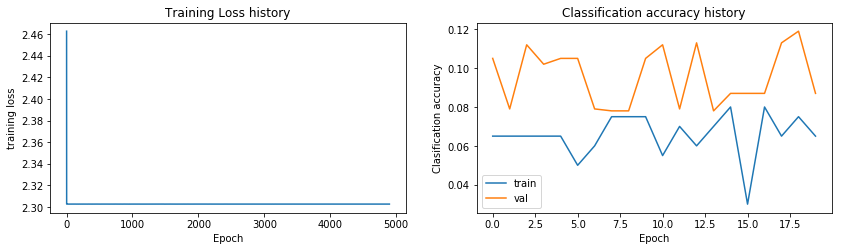

In [90]:
loss, train_acc, val_acc = history_tanh_4bn

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.2)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

**Expected Results**:

<pre>You should find that using batch normalization helps the network to converge faster.

e.g. Higher Accuracy with the same epoch

---
### c. Training Accuracy
Calculate the loss, and train-validation accuracy

In [91]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer_bn(X_train, W_tanh_4bn, b_tanh_4bn, bn_params_tanh, act_f='tanh')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy =',accuracy*100,'%')

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 10.026530612244898 %
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Expected Output**:

<pre>You should be able to get about <b>~54%</b> accuracy on training set using the initial run

In [92]:
y_pred = predict_multi_layer_bn(X_val, W_tanh_4bn, b_tanh_4bn, bn_params_tanh, act_f='tanh')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy =', accuracy*100,'%')

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 8.7 %
Validation label = [8 9 4 9 0 5 0 8 2 3 7 8 9 4 5]
Predicted label  = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Expected Output**:

<pre>You should also be able to get about <b>~48%</b> accuracy on validation set</pre>

You can retrain further the weights by adding the pre-trained `W` and `b` to the arguments when calling training function


---
### d. Comparison
let's compare between 4 layer tanh with and without batchnorm

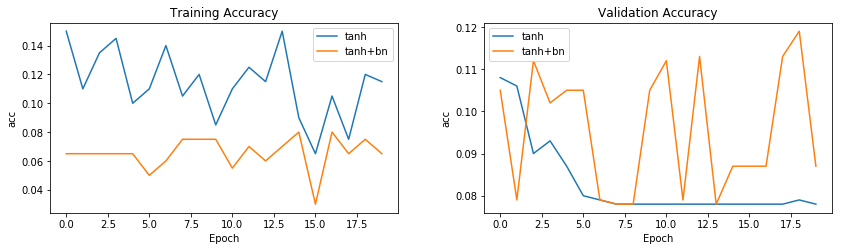

In [93]:
loss_tanh_4, train_tanh_4, val_tanh_4 = history_tanh_4
loss_tanh_4bn, train_tanh_4bn, val_tanh_4bn = history_tanh_4bn

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(train_tanh_4, label='tanh')
plt.plot(train_tanh_4bn, label='tanh+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Training Accuracy')

plt.subplot(122)
plt.plot(val_tanh_4, label='tanh')
plt.plot(val_tanh_4bn, label='tanh+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Validation Accuracy')
plt.show()

**Expected Output**:
<pre>You should find that using batch normalization helps the network to converge much faster.

e.g. Higher Accuracy with the same epoch

And what's more, let's compare the Accuracy between **tanh network trained with batchnorm** and **relu network trained without batchnorm**


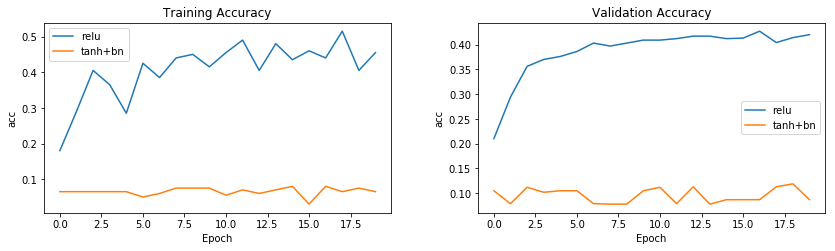

In [94]:
plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(train_relu_4, label='relu')
plt.plot(train_tanh_4bn, label='tanh+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Training Accuracy')

plt.subplot(122)
plt.plot(val_relu_4, label='relu')
plt.plot(val_tanh_4bn, label='tanh+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Validation Accuracy')
plt.show()

**Expected Output**:
<pre>You should find that the tanh network trained using batch normalization has its accuracy increases to almost equal to relu network

---
## 4 - Train ReLU with BatchNorm

Try the training Function using 3 hidden layer, 50 neurons each

You should see major improvement in accuracy when using more layer


---
### a. Train Network
First let's try the four layered tanh using batchnorm

In [95]:
hidden_size=[50, 50, 50]
lr=1e-2
np.random.seed(None)

W_relu_4bn, b_relu_4bn, history_relu_4bn, bn_params_relu = train_multi_layer_bn(    
    X_train, y_train, X_val, y_val, 
    hidden_size=hidden_size, 
    act_f='relu',
    std=1e-2, lr=lr, 
    lr_decay=0.9, reg=0.01, 
    epochs=20)


start training using relu activation function
iteration 100 (epoch 1 / 20 ): loss = 2.3025813730147293
iteration 200 (epoch 1 / 20 ): loss = 2.3025923369821606
iteration 300 (epoch 2 / 20 ): loss = 2.3025902668010674
iteration 400 (epoch 2 / 20 ): loss = 2.3025918802548078
iteration 500 (epoch 3 / 20 ): loss = 2.3025932057865064
iteration 600 (epoch 3 / 20 ): loss = 2.3025851007118536
iteration 700 (epoch 3 / 20 ): loss = 2.3025867267724123
iteration 800 (epoch 4 / 20 ): loss = 2.302571272151179
iteration 900 (epoch 4 / 20 ): loss = 2.302563975635925
iteration 1000 (epoch 5 / 20 ): loss = 2.302570499725016
iteration 1100 (epoch 5 / 20 ): loss = 2.3025841208964364
iteration 1200 (epoch 5 / 20 ): loss = 2.302567878542117
iteration 1300 (epoch 6 / 20 ): loss = 2.302583478565824
iteration 1400 (epoch 6 / 20 ): loss = 2.302574027143959
iteration 1500 (epoch 7 / 20 ): loss = 2.302592800799395
iteration 1600 (epoch 7 / 20 ): loss = 2.3025973238309136
iteration 1700 (epoch 7 / 20 ): loss = 2.3

**Expected Output**:
<pre>
loss should starts around 2.2 and ends around 1.2

---
### b. Visualize Training
Visualize the loss, and train-validation accuracy

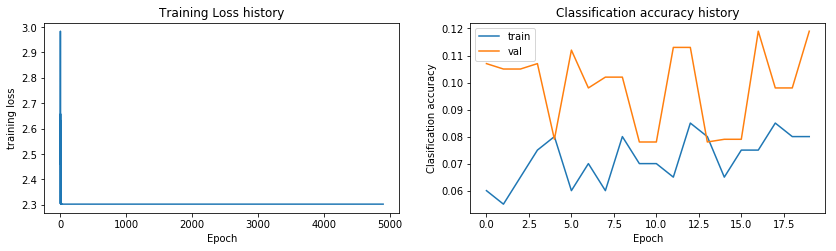

In [96]:
loss, train_acc, val_acc = history_relu_4bn

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.2)

plt.subplot(121)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(122)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Classification accuracy history')
plt.show()

**Expected Results**:

<pre>You should find that using batch normalization helps the network to converge much faster.

e.g. Higher Accuracy with the same epoch

---
### c. Training Accuracy
Calculate the loss, and train-validation accuracy

In [98]:
import sklearn
from sklearn.metrics import accuracy_score

y_pred = predict_multi_layer_bn(X_train, W_relu_4bn, b_relu_4bn, bn_params_relu, act_f='relu')
accuracy = sklearn.metrics.accuracy_score(y_train, y_pred)

print('Training Accuracy =',accuracy*100,'%')

print('Training label  =',y_train[:15])
print('Predicted label =',y_pred[:15])

Training Accuracy = 9.961224489795919 %
Training label  = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]
Predicted label = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Expected Output**:

<pre>You should be able to get about <b>~64%</b> accuracy on training set using the initial run

In [99]:
y_pred = predict_multi_layer_bn(X_val, W_relu_4bn, b_relu_4bn, bn_params_relu, act_f='relu')
accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
print('Validation Accuracy =', accuracy*100,'%')

print('Validation label =',y_val[:15])
print('Predicted label  =',y_pred[:15])

Validation Accuracy = 11.899999999999999 %
Validation label = [8 9 4 9 0 5 0 8 2 3 7 8 9 4 5]
Predicted label  = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Expected Output**:

<pre>You should also be able to get about <b>~53%</b> accuracy on validation set</pre>

You can retrain further the weights by adding the pre-trained `W` and `b` to the arguments when calling training function


---
### d. Comparison
let's compare between 4 layer relu with and without batchnorm

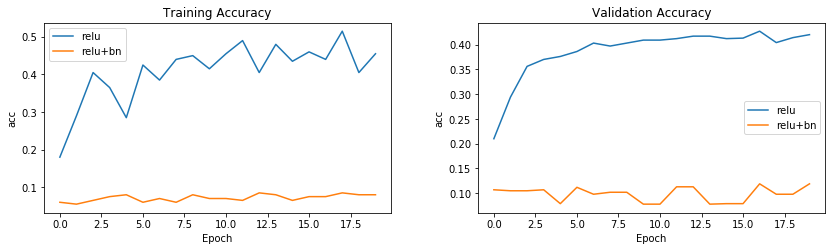

In [100]:
loss_relu_4, train_relu_4, val_relu_4 = history_relu_4
loss_relu_4bn, train_relu_4bn, val_relu_4bn = history_relu_4bn

plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.25)

plt.subplot(121)
plt.plot(train_relu_4, label='relu')
plt.plot(train_relu_4bn, label='relu+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Training Accuracy')

plt.subplot(122)
plt.plot(val_relu_4, label='relu')
plt.plot(val_relu_4bn, label='relu+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.title('Validation Accuracy')
plt.show()

**Expected Output**:
<pre>You should find that using batch normalization helps the network to converge faster, but in this case, not by much.

This happen because relu does not squash the activation distribution like tanh.

It means that relu already perform well without natchnorm, and the addition of batchnorm helps a bit

---
## 5 - Comparison
Now let's see if we compare all four networks

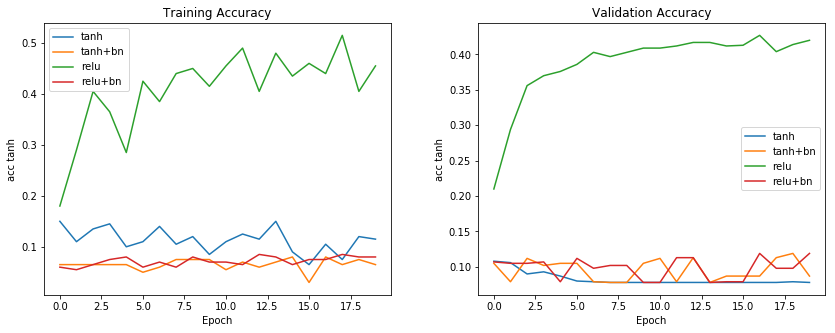

In [101]:
plt.rcParams['figure.figsize'] = [14, 5]
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.3)

plt.subplot(121)
plt.plot(train_tanh_4, label='tanh')
plt.plot(train_tanh_4bn, label='tanh+bn')
plt.plot(train_relu_4, label='relu')
plt.plot(train_relu_4bn, label='relu+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc tanh')
plt.title('Training Accuracy')

plt.subplot(122)
plt.plot(val_tanh_4, label='tanh')
plt.plot(val_tanh_4bn, label='tanh+bn')
plt.plot(val_relu_4, label='relu')
plt.plot(val_relu_4bn, label='relu+bn')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('acc tanh')
plt.title('Validation Accuracy')

plt.show()

**Expected Output**:

<pre>You should see that Batch Norm increase the accuracy


---

# Congratulation, You've Completed Exercise 3

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2019 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)